Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Read the dataset 

In [2]:
data = pd.read_csv("ibm-hr-analytics-employee-attrition-performance.zip")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


This dataset contains the details of HR Analytics case study in this dataset numerical and categorical data is present. Here Attrition is our target/output veriable, Attrition which contains categorical so it will be termed as a classification problem where we need to predict the several Attrition using the classification problem.

# EDA (Exploratory Data Analysis)

In [3]:
# check the shape of dataset 
data.shape

(1470, 35)

This dataset contains 1470 rows and 35 columns. out of which 1 target variable and remaining 34 are independent variables

In [4]:
# chekc the columns of dataset 
data.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [5]:
# check the data types of data
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

as i see there is some data are int64 and some are object datatype

In [6]:
# check the  null value of the data 
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no single null value present in this dataset 

In [7]:
# check the information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

check the information about the data

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


This gives the statistical information of numericcal columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

The counts of all the columns are smae which means there are no missing values in the dataset.

In [9]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

as i see in this dataset Over18 and StandardHours only one unique value 

In [10]:
# check the categorical and numerical columns 
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i] =="object":
        categorical_col.append(i)
print("categorical columns: ", categorical_col)
print("\n")

numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns: ", numerical_col)

categorical columns:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


numerical columns:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


There is split the data into two parts categorical and numerial columns

# Data Visualization

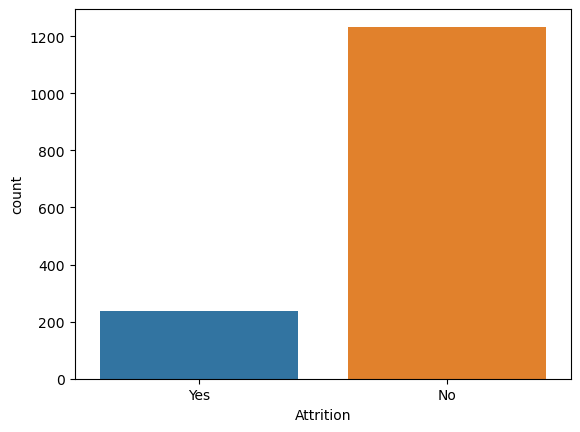

In [11]:
sns.countplot(x=data.Attrition)
plt.show()

There is more no. of no and less no of yes so there is big difference in counts of the values 

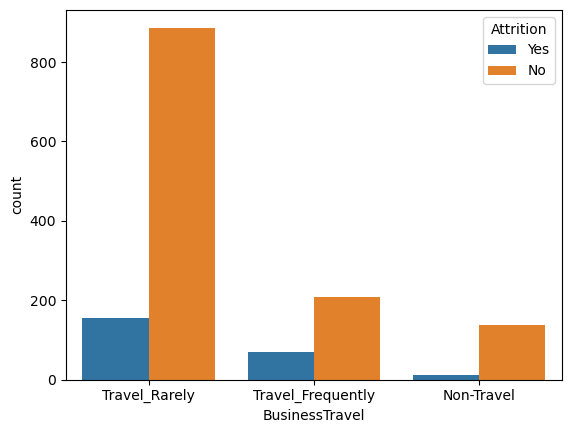

In [12]:
sns.countplot(hue=data.Attrition, x=data.BusinessTravel)
plt.show()

in this dataset employee who has travels less are not satisfied

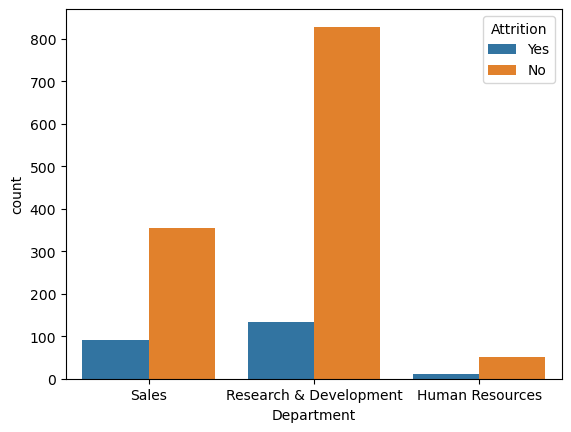

In [13]:
sns.countplot(hue=data.Attrition,x=data.Department )
plt.show()

in this dataset the employee who has in research and development department more no. of Attrition no that means they are not satisfied with our work

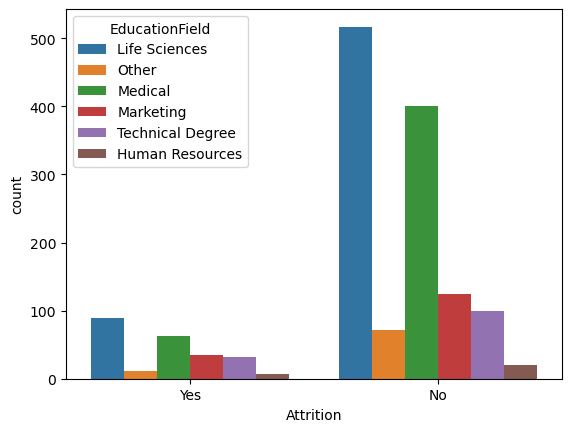

In [14]:
sns.countplot(x=data.Attrition,hue=data.EducationField)
plt.show()

in this dataset the employees who has in life science they are no that means quit the job

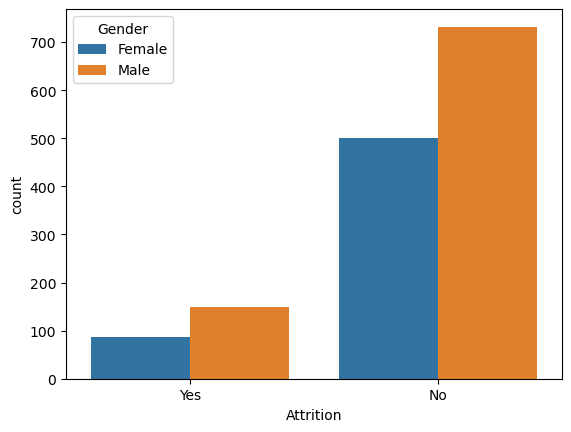

In [15]:
sns.countplot(x=data.Attrition, hue=data.Gender)
plt.show()

in this dataset more male employee quit job  

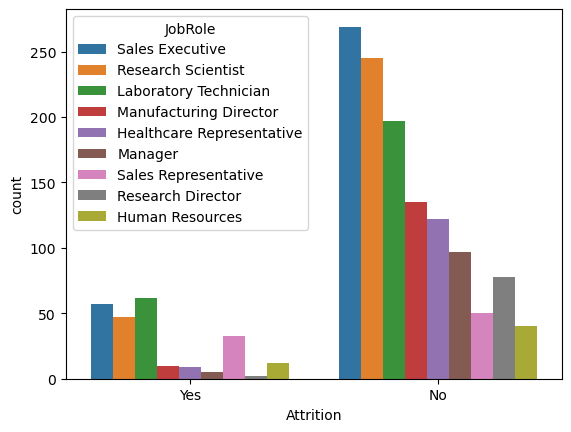

In [16]:
sns.countplot(x=data.Attrition, hue=data.JobRole)
plt.show()

in this dataset who has in sales department they have not happy in our job role

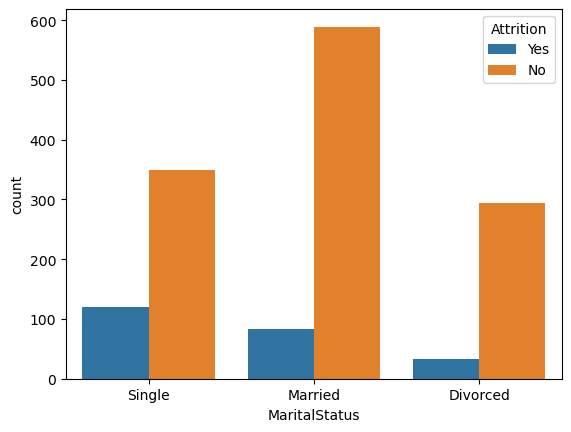

In [17]:
sns.countplot(hue=data.Attrition, x=data.MaritalStatus)
plt.show()

in this dataset who has married they have more no of no that means they have quit the job

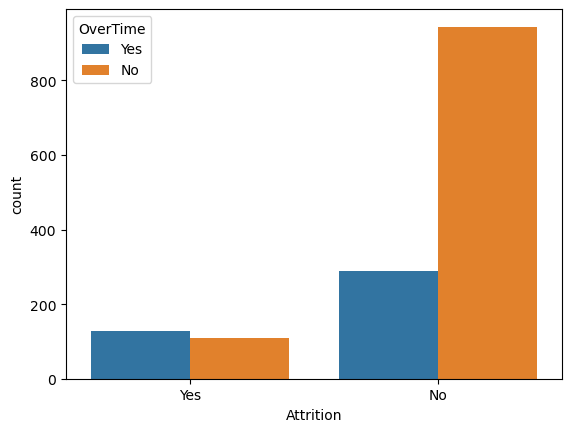

In [19]:
sns.countplot(x=data.Attrition, hue=data.OverTime)
plt.show()

in this dataset who has do overtime they quit the job 

In [20]:
numerical_col = []
for i in data.columns:
    if data[i].dtype =="int64" and len(data[i].unique()) >=10:
        
        numerical_col.append(i)

In [21]:
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [22]:
data1 = data[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

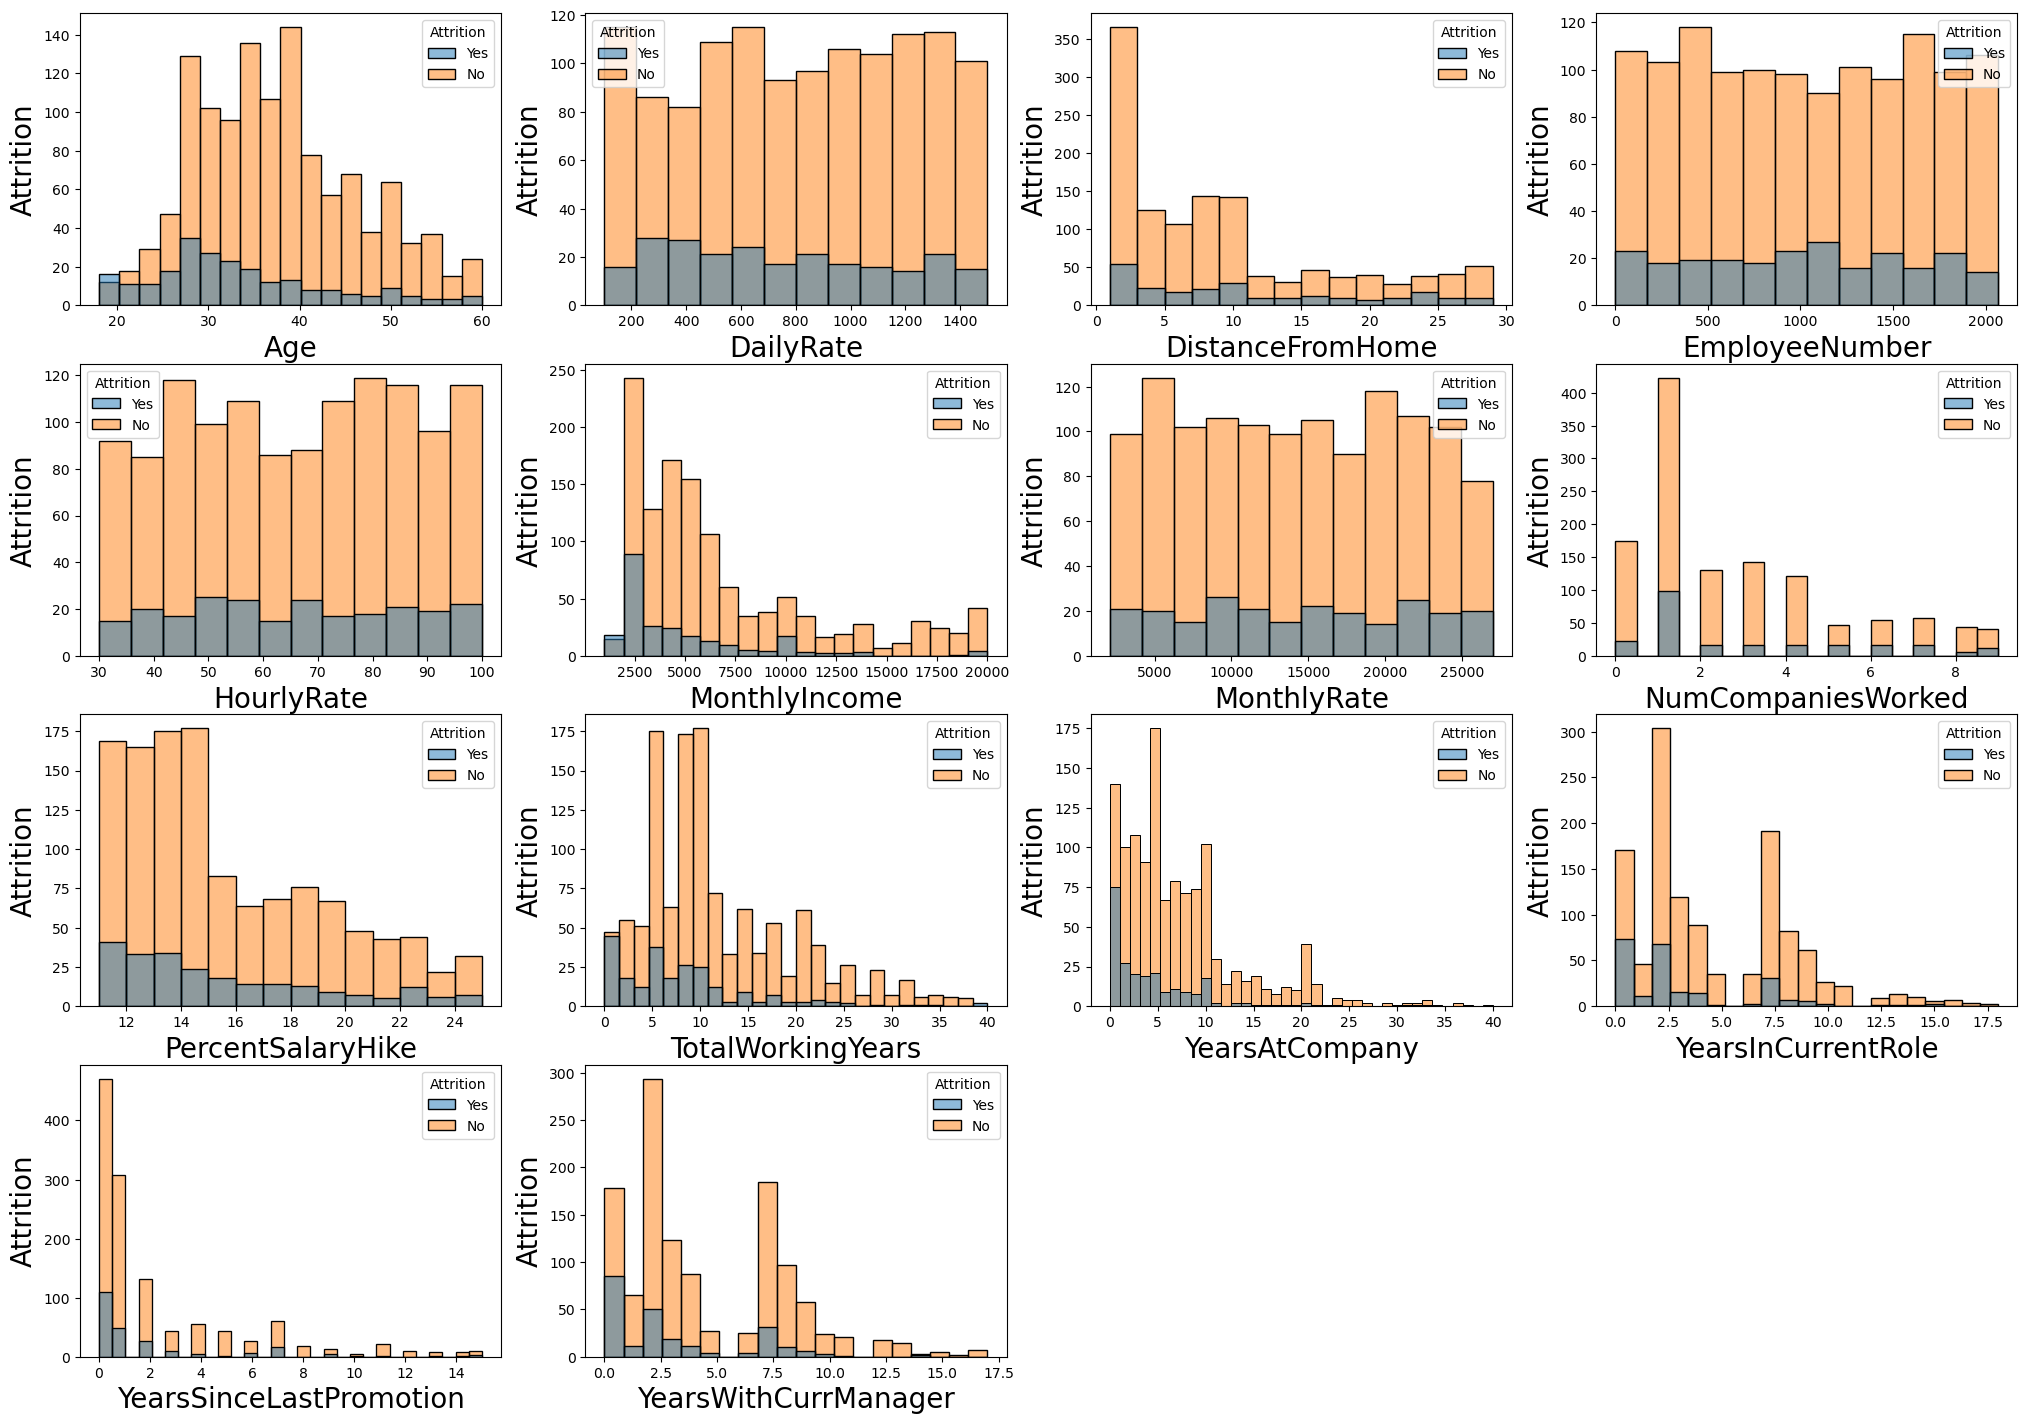

In [23]:
plt.figure(figsize=(25,22), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.histplot(x=data1[column].dropna(axis=0),hue=data.Attrition)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Attrition', fontsize=20)
    plotnumber+=1
plt.show()

here we visualization all the continous data in one graph histplot

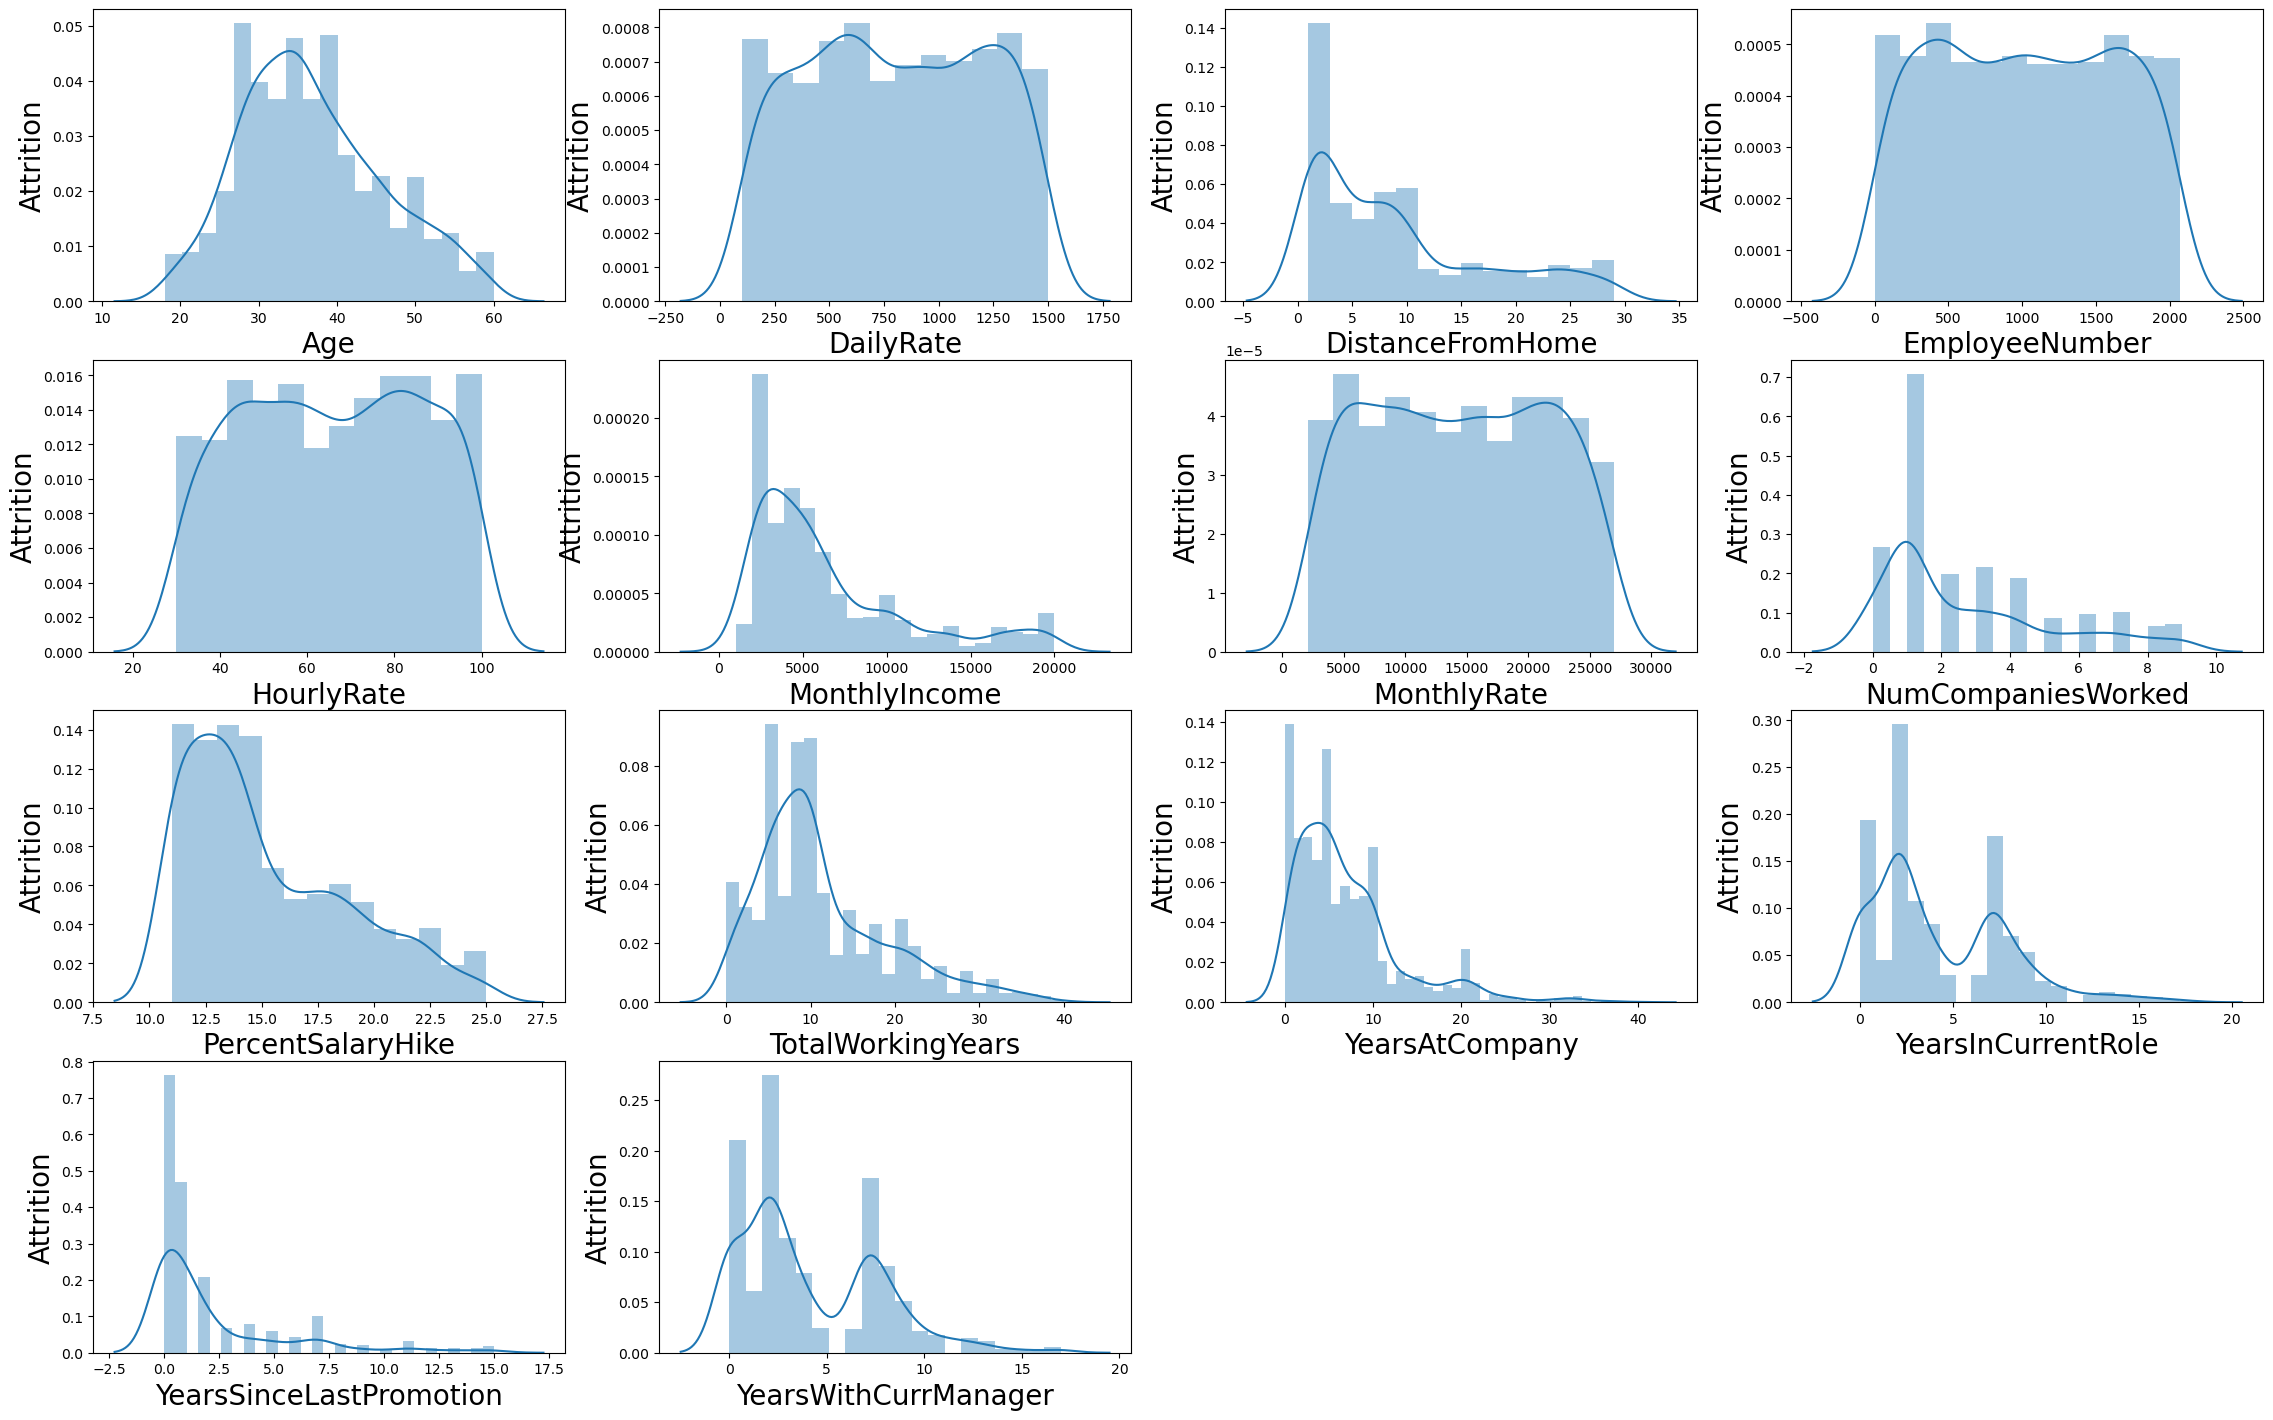

In [24]:
plt.figure(figsize=(28,22), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(x=data1[column].dropna(axis=0))
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Attrition', fontsize=20)
    plotnumber+=1
plt.show()

here we visualization all the continous data in one graph distplot

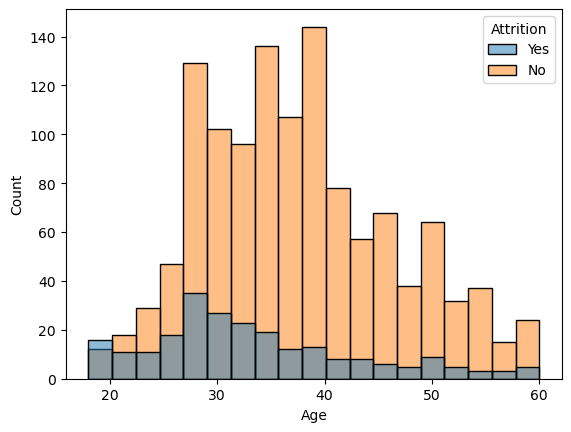

In [25]:
sns.histplot(hue=data.Attrition,x=data.Age)
plt.show()

in this dataset who is 30 to 40 they have leave the job

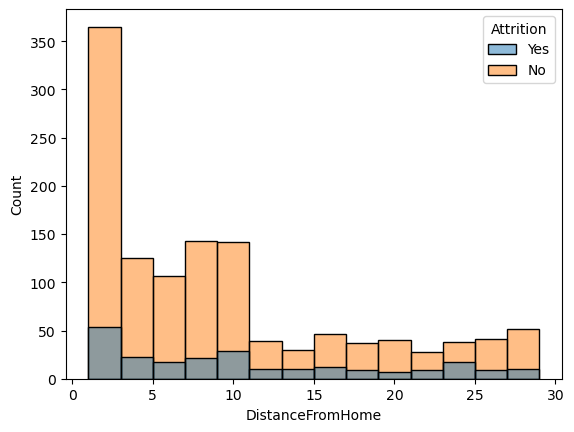

In [27]:
sns.histplot(hue=data.Attrition,x=data.DistanceFromHome)
plt.show()

in this data the employee who has 0 to 10 they are quit the job

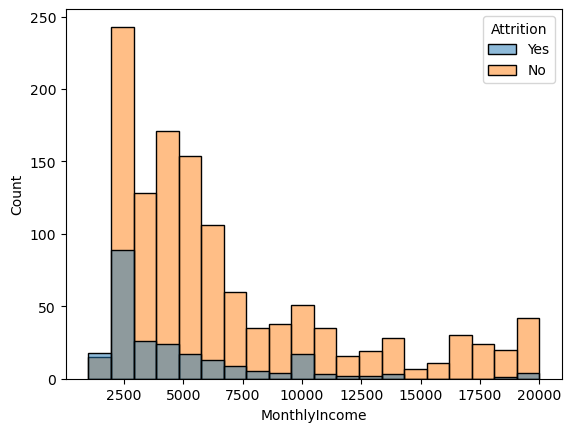

In [30]:
sns.histplot(hue=data.Attrition,x=data.MonthlyIncome)
plt.show()

in this data who has monthly income 2500 they are quit the job

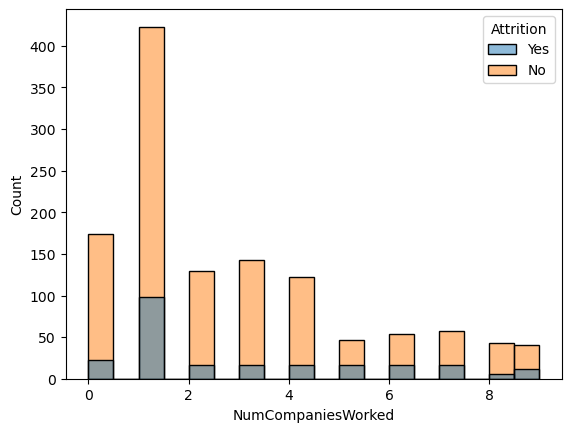

In [32]:
sns.histplot(hue=data.Attrition,x=data.NumCompaniesWorked)
plt.show()

in this data the employee who worked in 1 company they are quit the job

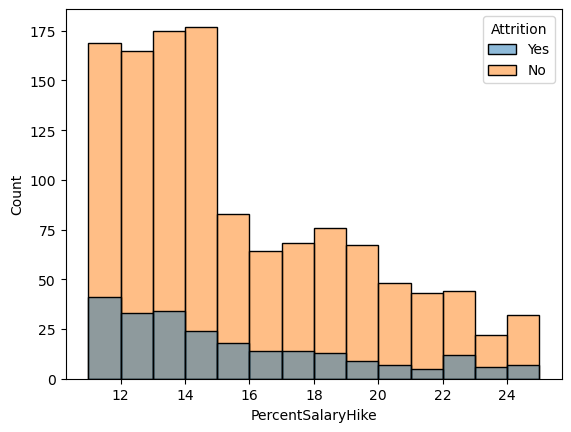

In [33]:
sns.histplot(hue=data.Attrition,x=data.PercentSalaryHike)
plt.show()

in this data salley hike so lesser the employee quit the job

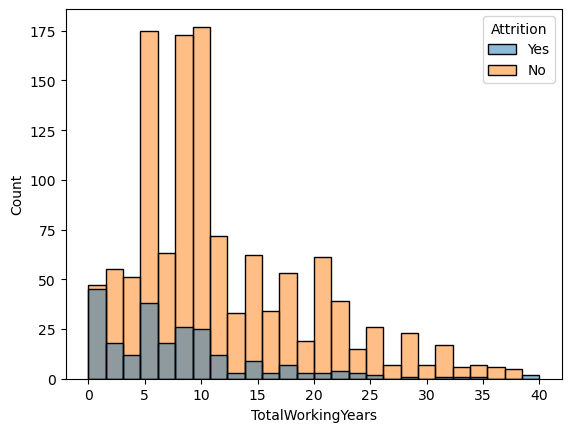

In [34]:
sns.histplot(hue=data.Attrition,x=data.TotalWorkingYears)
plt.show()

in this dataset who has less than 10 years of working they are quit the job

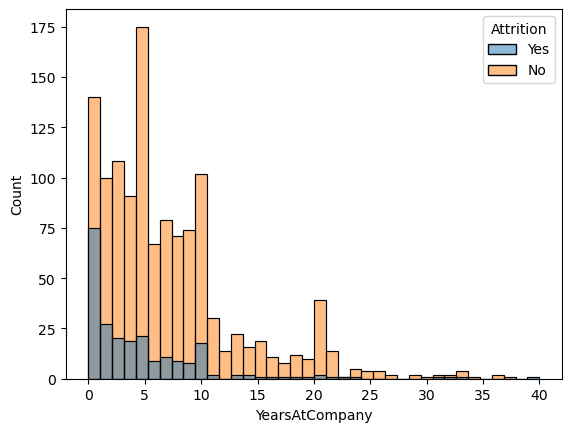

In [35]:
sns.histplot(hue=data.Attrition,x=data.YearsAtCompany)
plt.show()

in this data who has in less than 10 years they are quit the job 

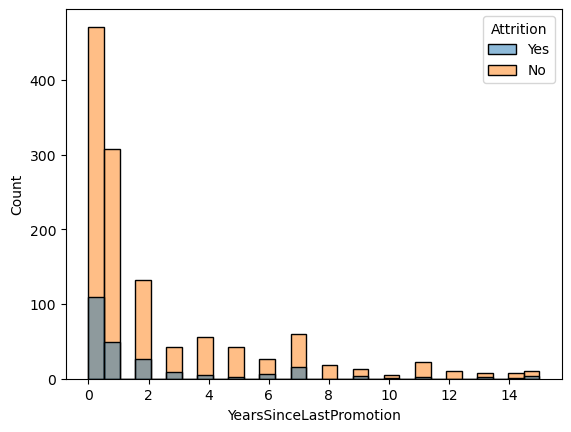

In [37]:
sns.histplot(hue=data.Attrition,x=data.YearsSinceLastPromotion)
plt.show()

in this dataset who has in less than 3 years since last promotion they are quit the job

In [39]:
discreate_col = []
for i in data.columns:
    if data[i].dtypes =="int64" and len(data[i].unique()) <= 10:
        discreate_col.append (i)

In [40]:
discreate_col

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [41]:
data2 = data[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]

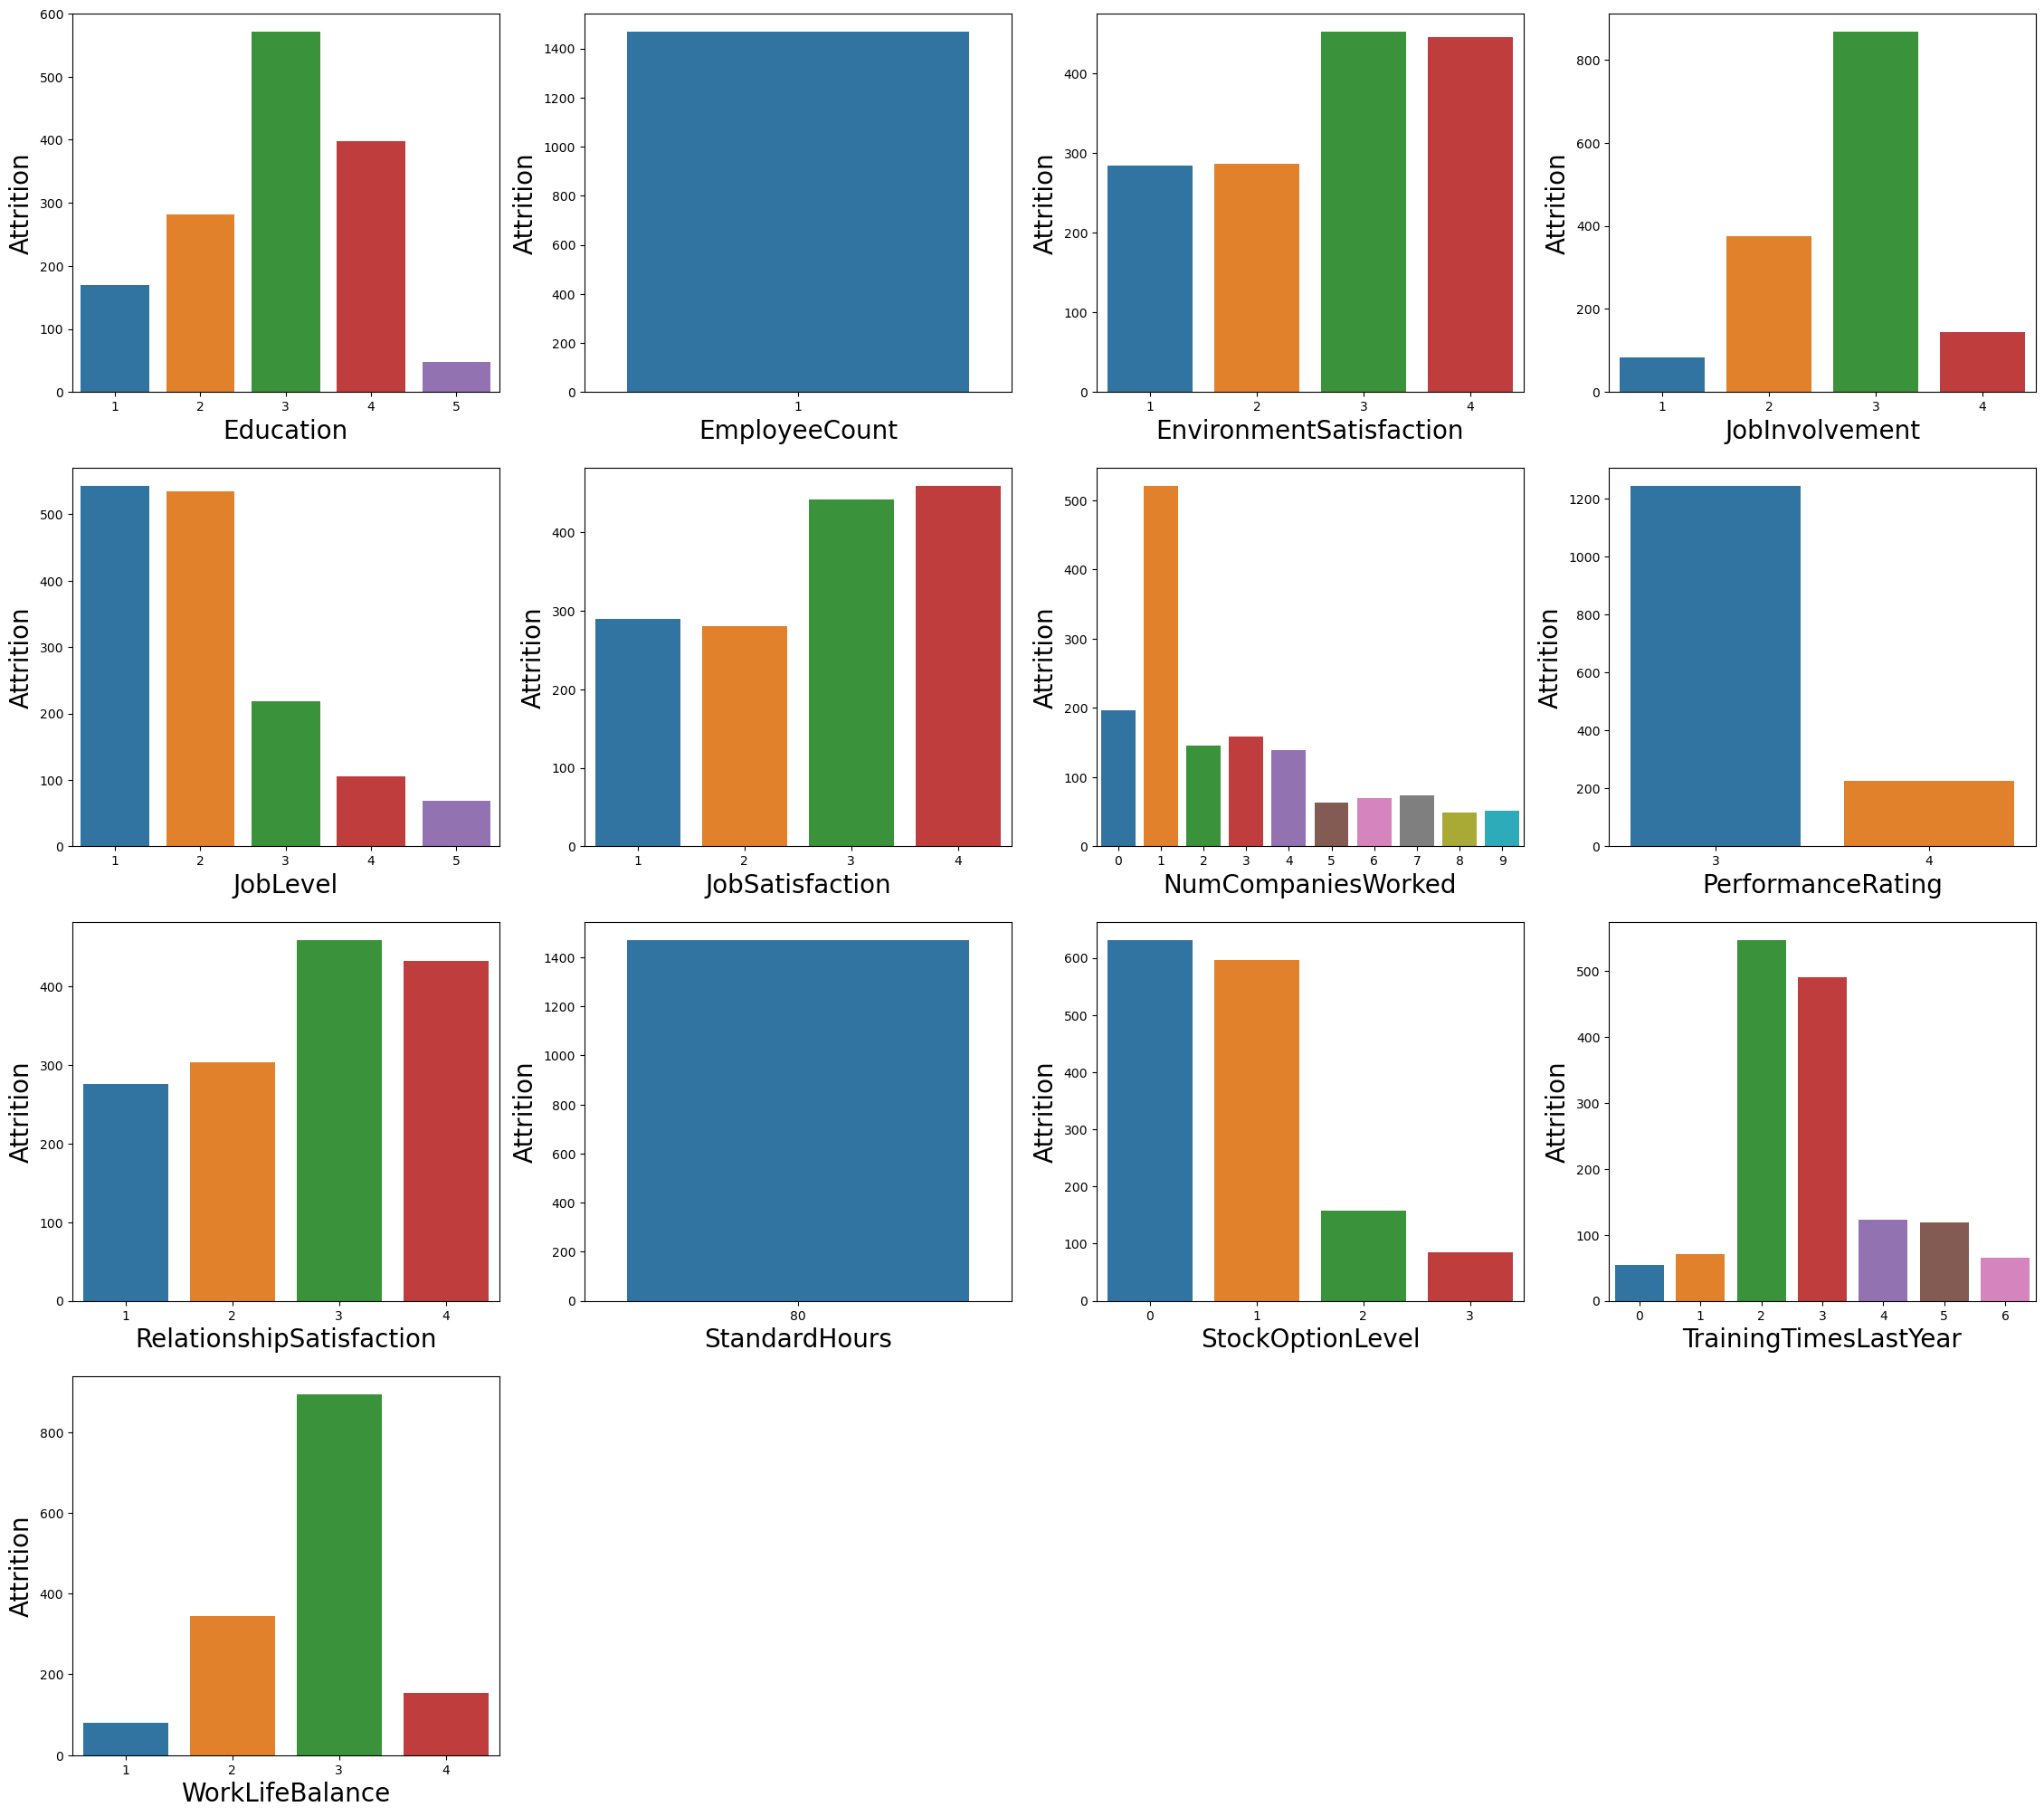

In [42]:
plt.figure(figsize=(28,25), facecolor="white")
plotnumber = 1

for column in data2:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data2[column].dropna(axis=0))
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Attrition', fontsize=20)
    plotnumber+=1
plt.show()

here we visualization all the discreate  data in one graph using countplot

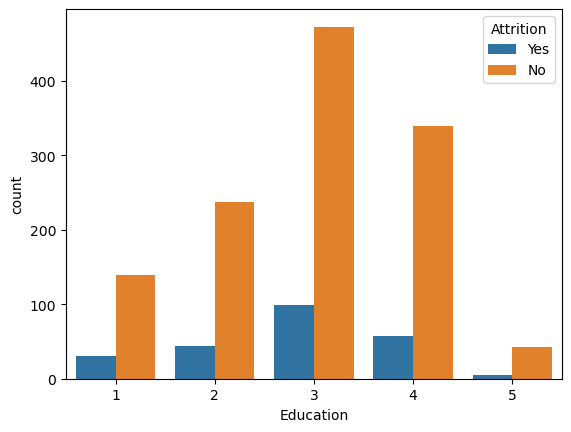

In [43]:
sns.countplot(hue=data.Attrition, x=data.Education)
plt.show()

in this dataset who has education in 3 they are quit the job

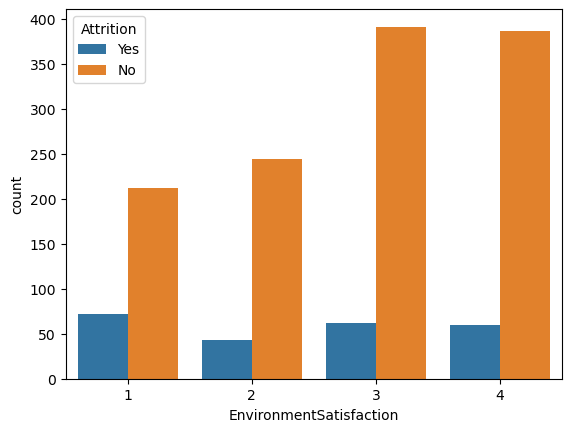

In [45]:
sns.countplot(hue=data.Attrition, x=data.EnvironmentSatisfaction)
plt.show()

in this dataset who has environment satisfaction more than 2 they quit the job

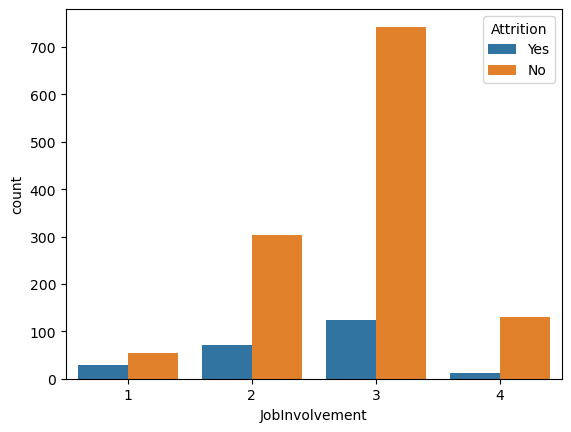

In [46]:
sns.countplot(hue=data.Attrition, x=data.JobInvolvement)
plt.show()

in this dataset who has job involvement 2 to 3 they all quit the job

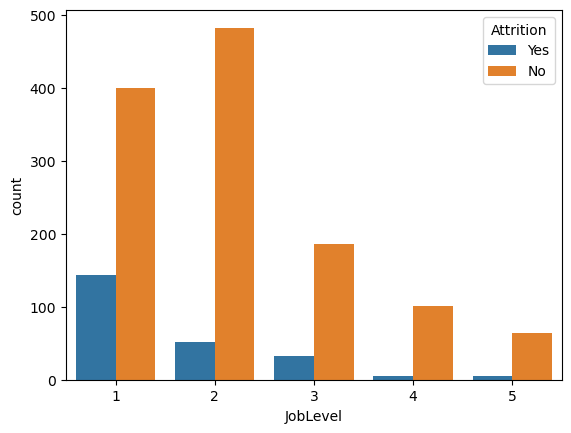

In [47]:
sns.countplot(hue=data.Attrition, x=data.JobLevel)
plt.show()

in this dataset who has less tha 2 job level they all quit the job

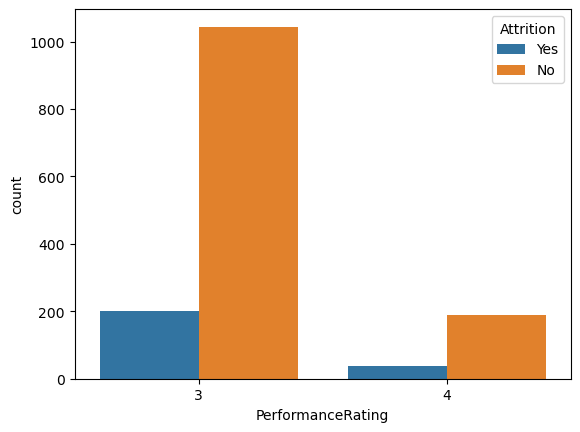

In [50]:
sns.countplot(hue=data.Attrition, x=data.PerformanceRating)
plt.show()

in this data set who has performing rate 3 they all quit the job

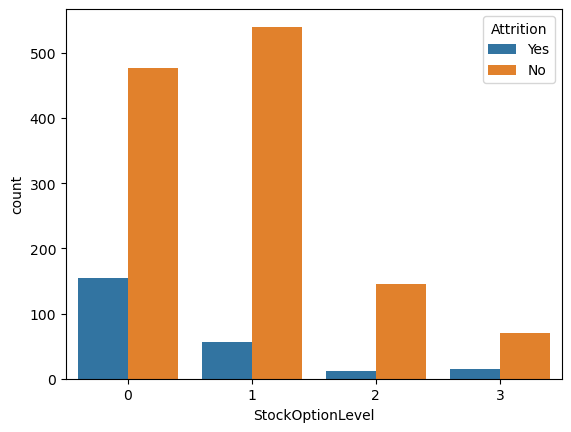

In [53]:
sns.countplot(hue=data.Attrition, x=data.StockOptionLevel)
plt.show()

in this dataset who has less then 1 stock option level they all  quit the job 

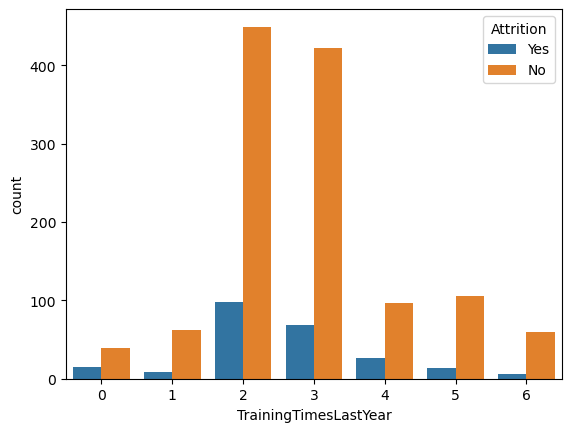

In [54]:
sns.countplot(hue=data.Attrition, x=data.TrainingTimesLastYear)
plt.show()

in this dataset who has 2 to 3 training times last year they quit the job

In [56]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


there is check the correlation, in this dataset 2 columns are none 

In [57]:
data.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)

Drop the columns who has nan or only one unique valuevalue

In [58]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


check the correlation

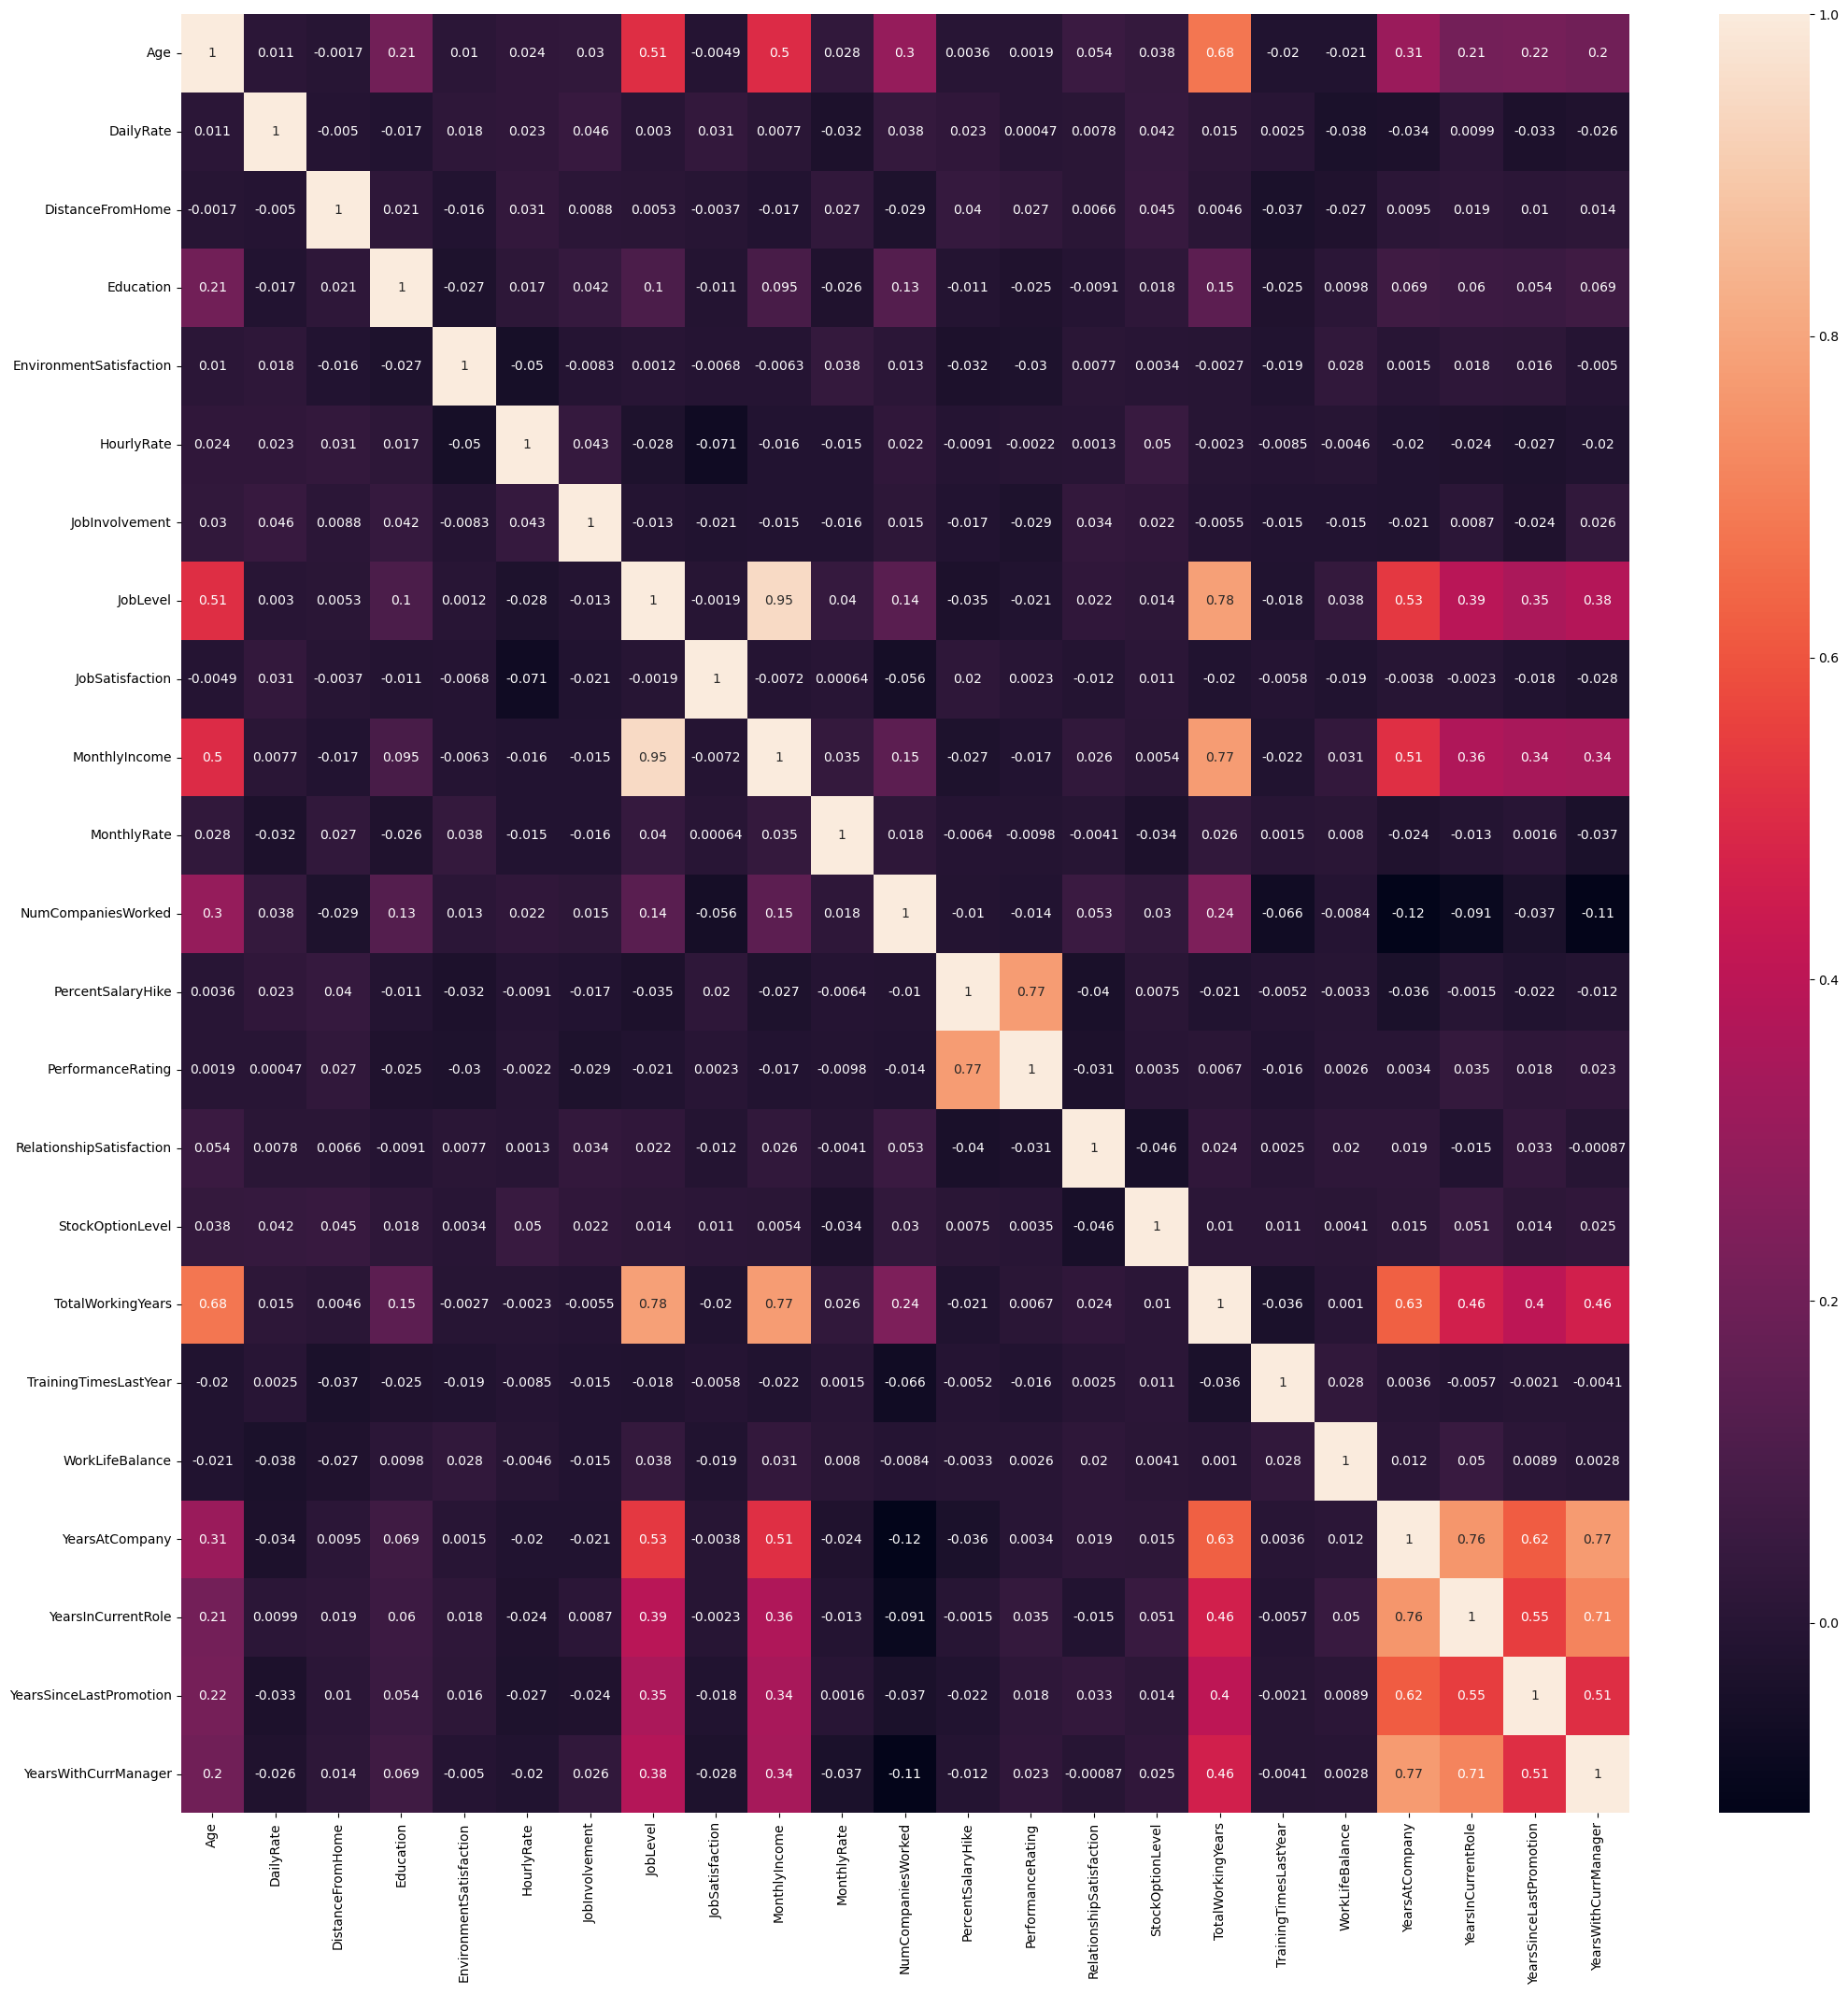

In [59]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

Check the co relation usign heat map

In [60]:
from sklearn.preprocessing import OrdinalEncoder

In [61]:
ord_enc = OrdinalEncoder()
for i in data.columns:
    if data [i].dtypes=='object':
        data[i] = ord_enc.fit_transform(data[i].values.reshape(-1,1))
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8


Encoded the data usign Ordinal Encoder

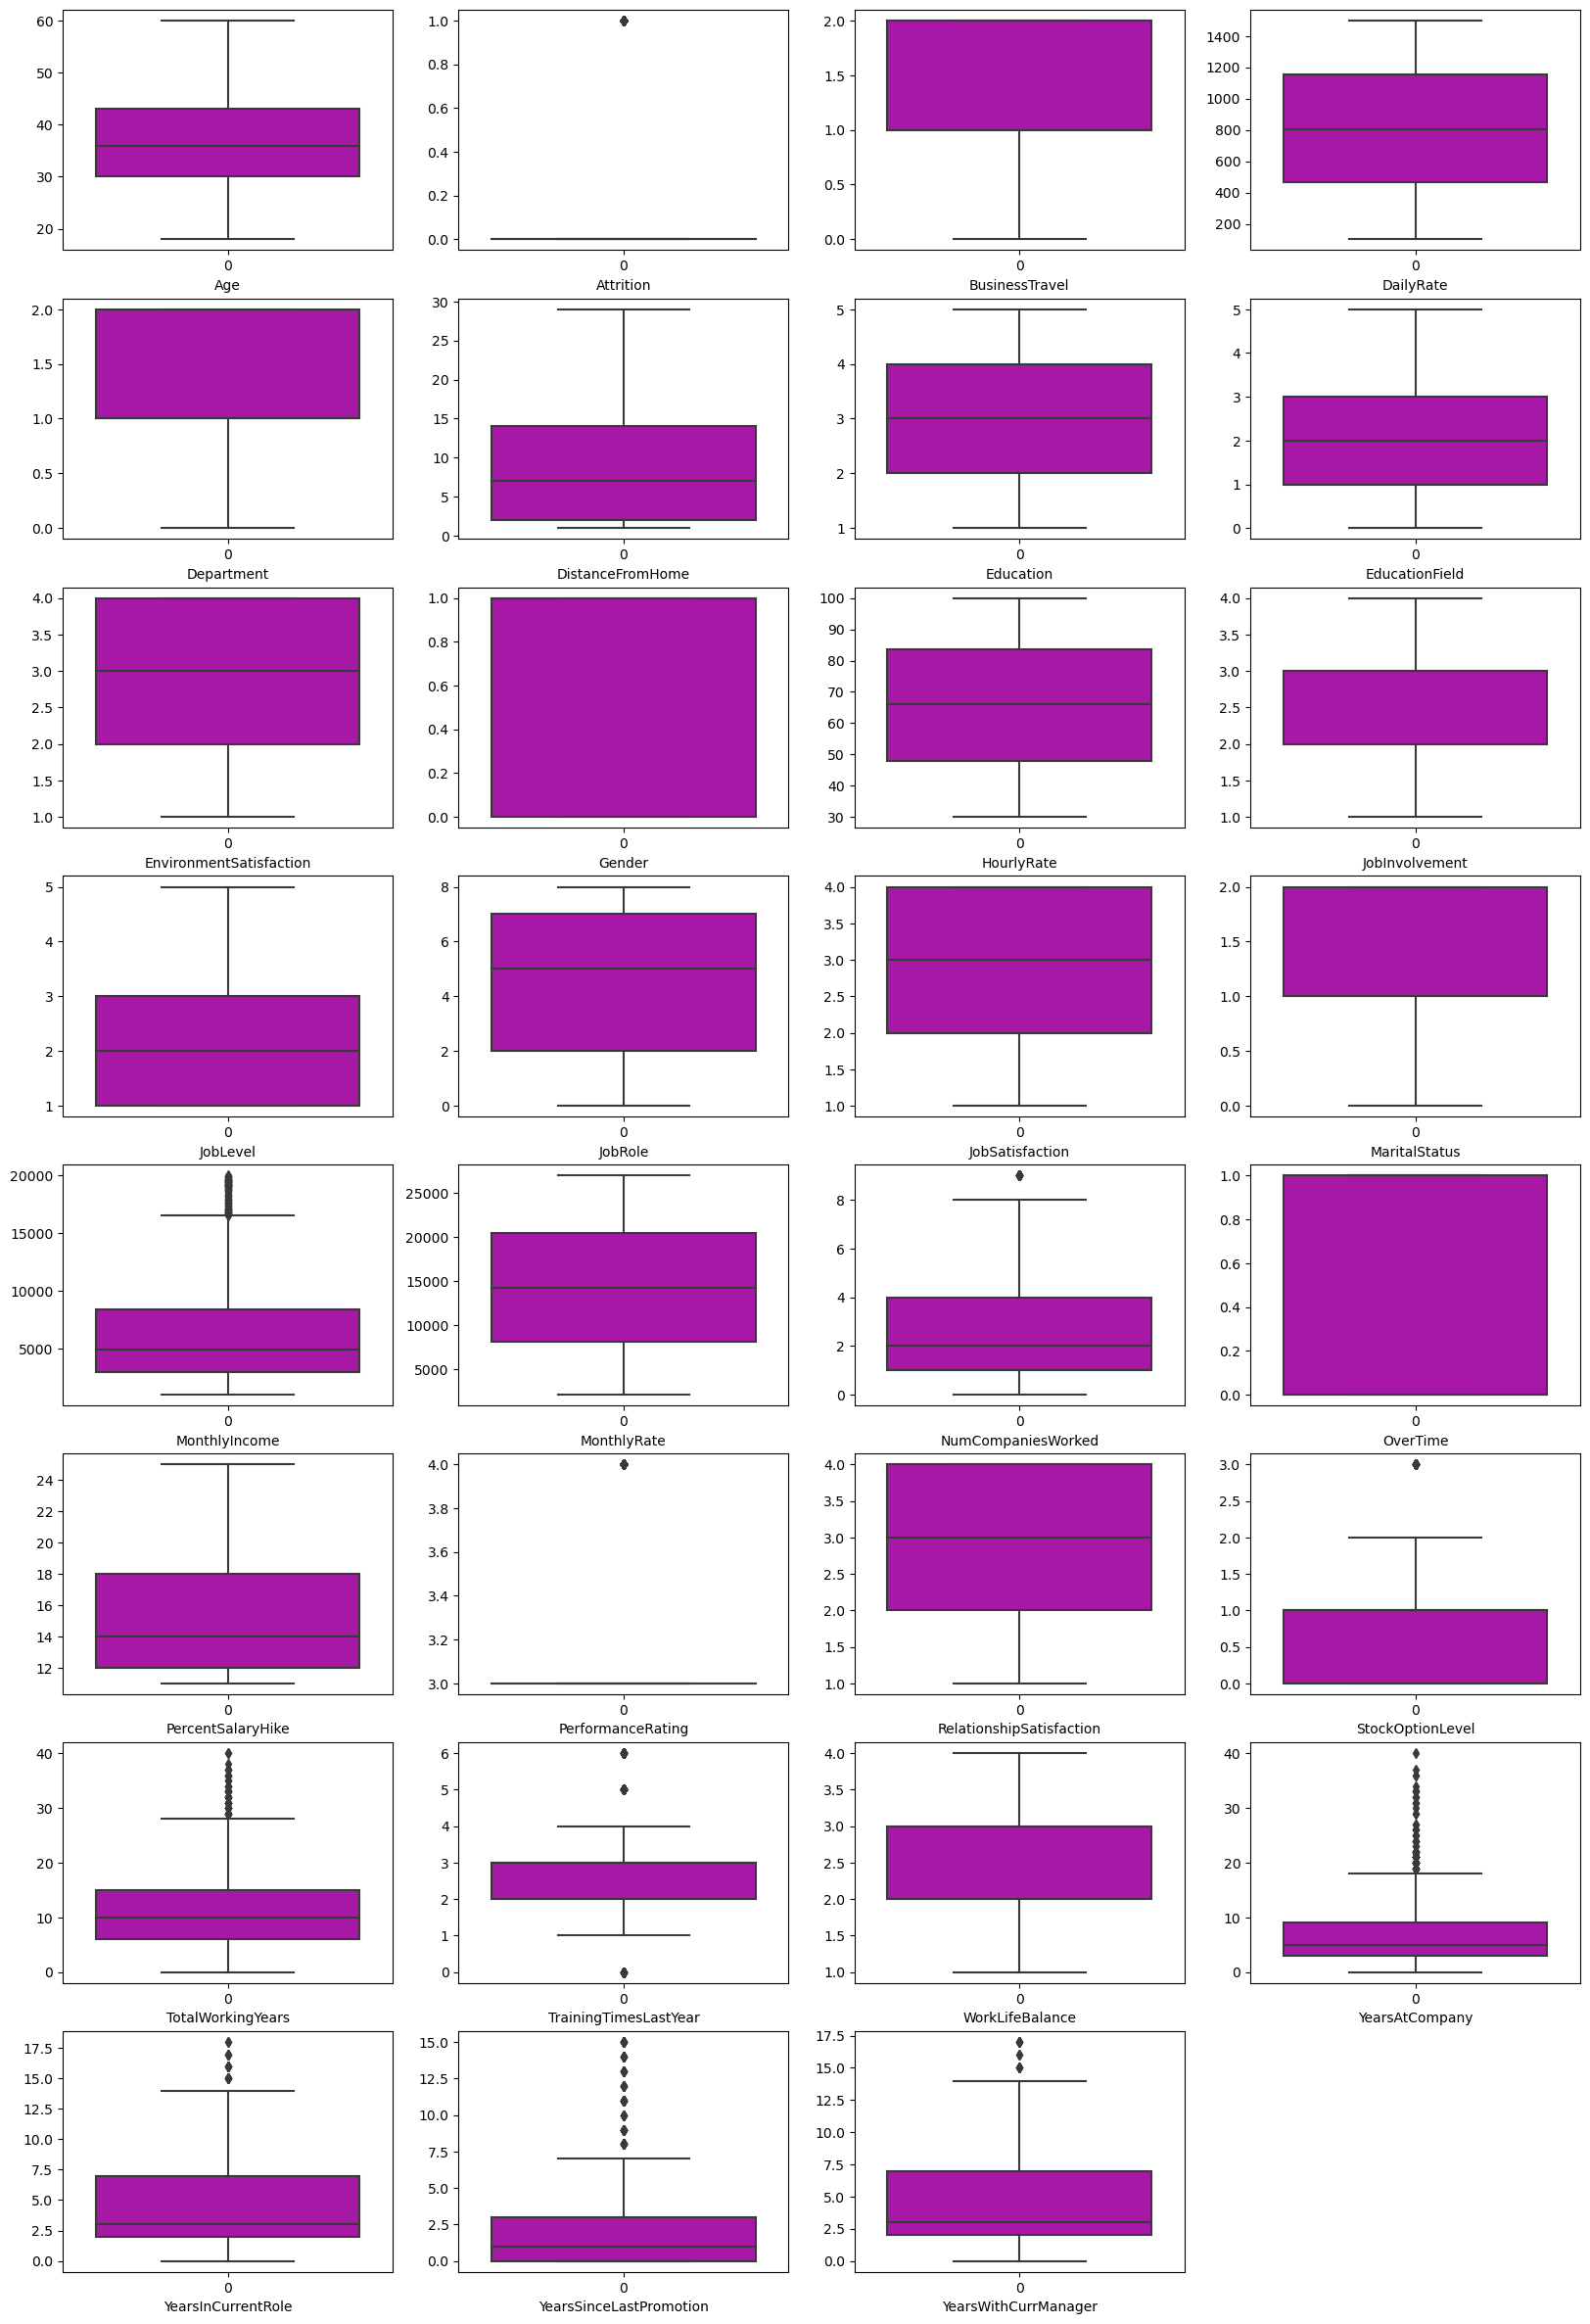

In [62]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for col in data:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(data[col], color="m")
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.show()

check the skewness usign boxplot, so we found in this data set some colums are skewness, so we will remove the skewness before selecting the model 

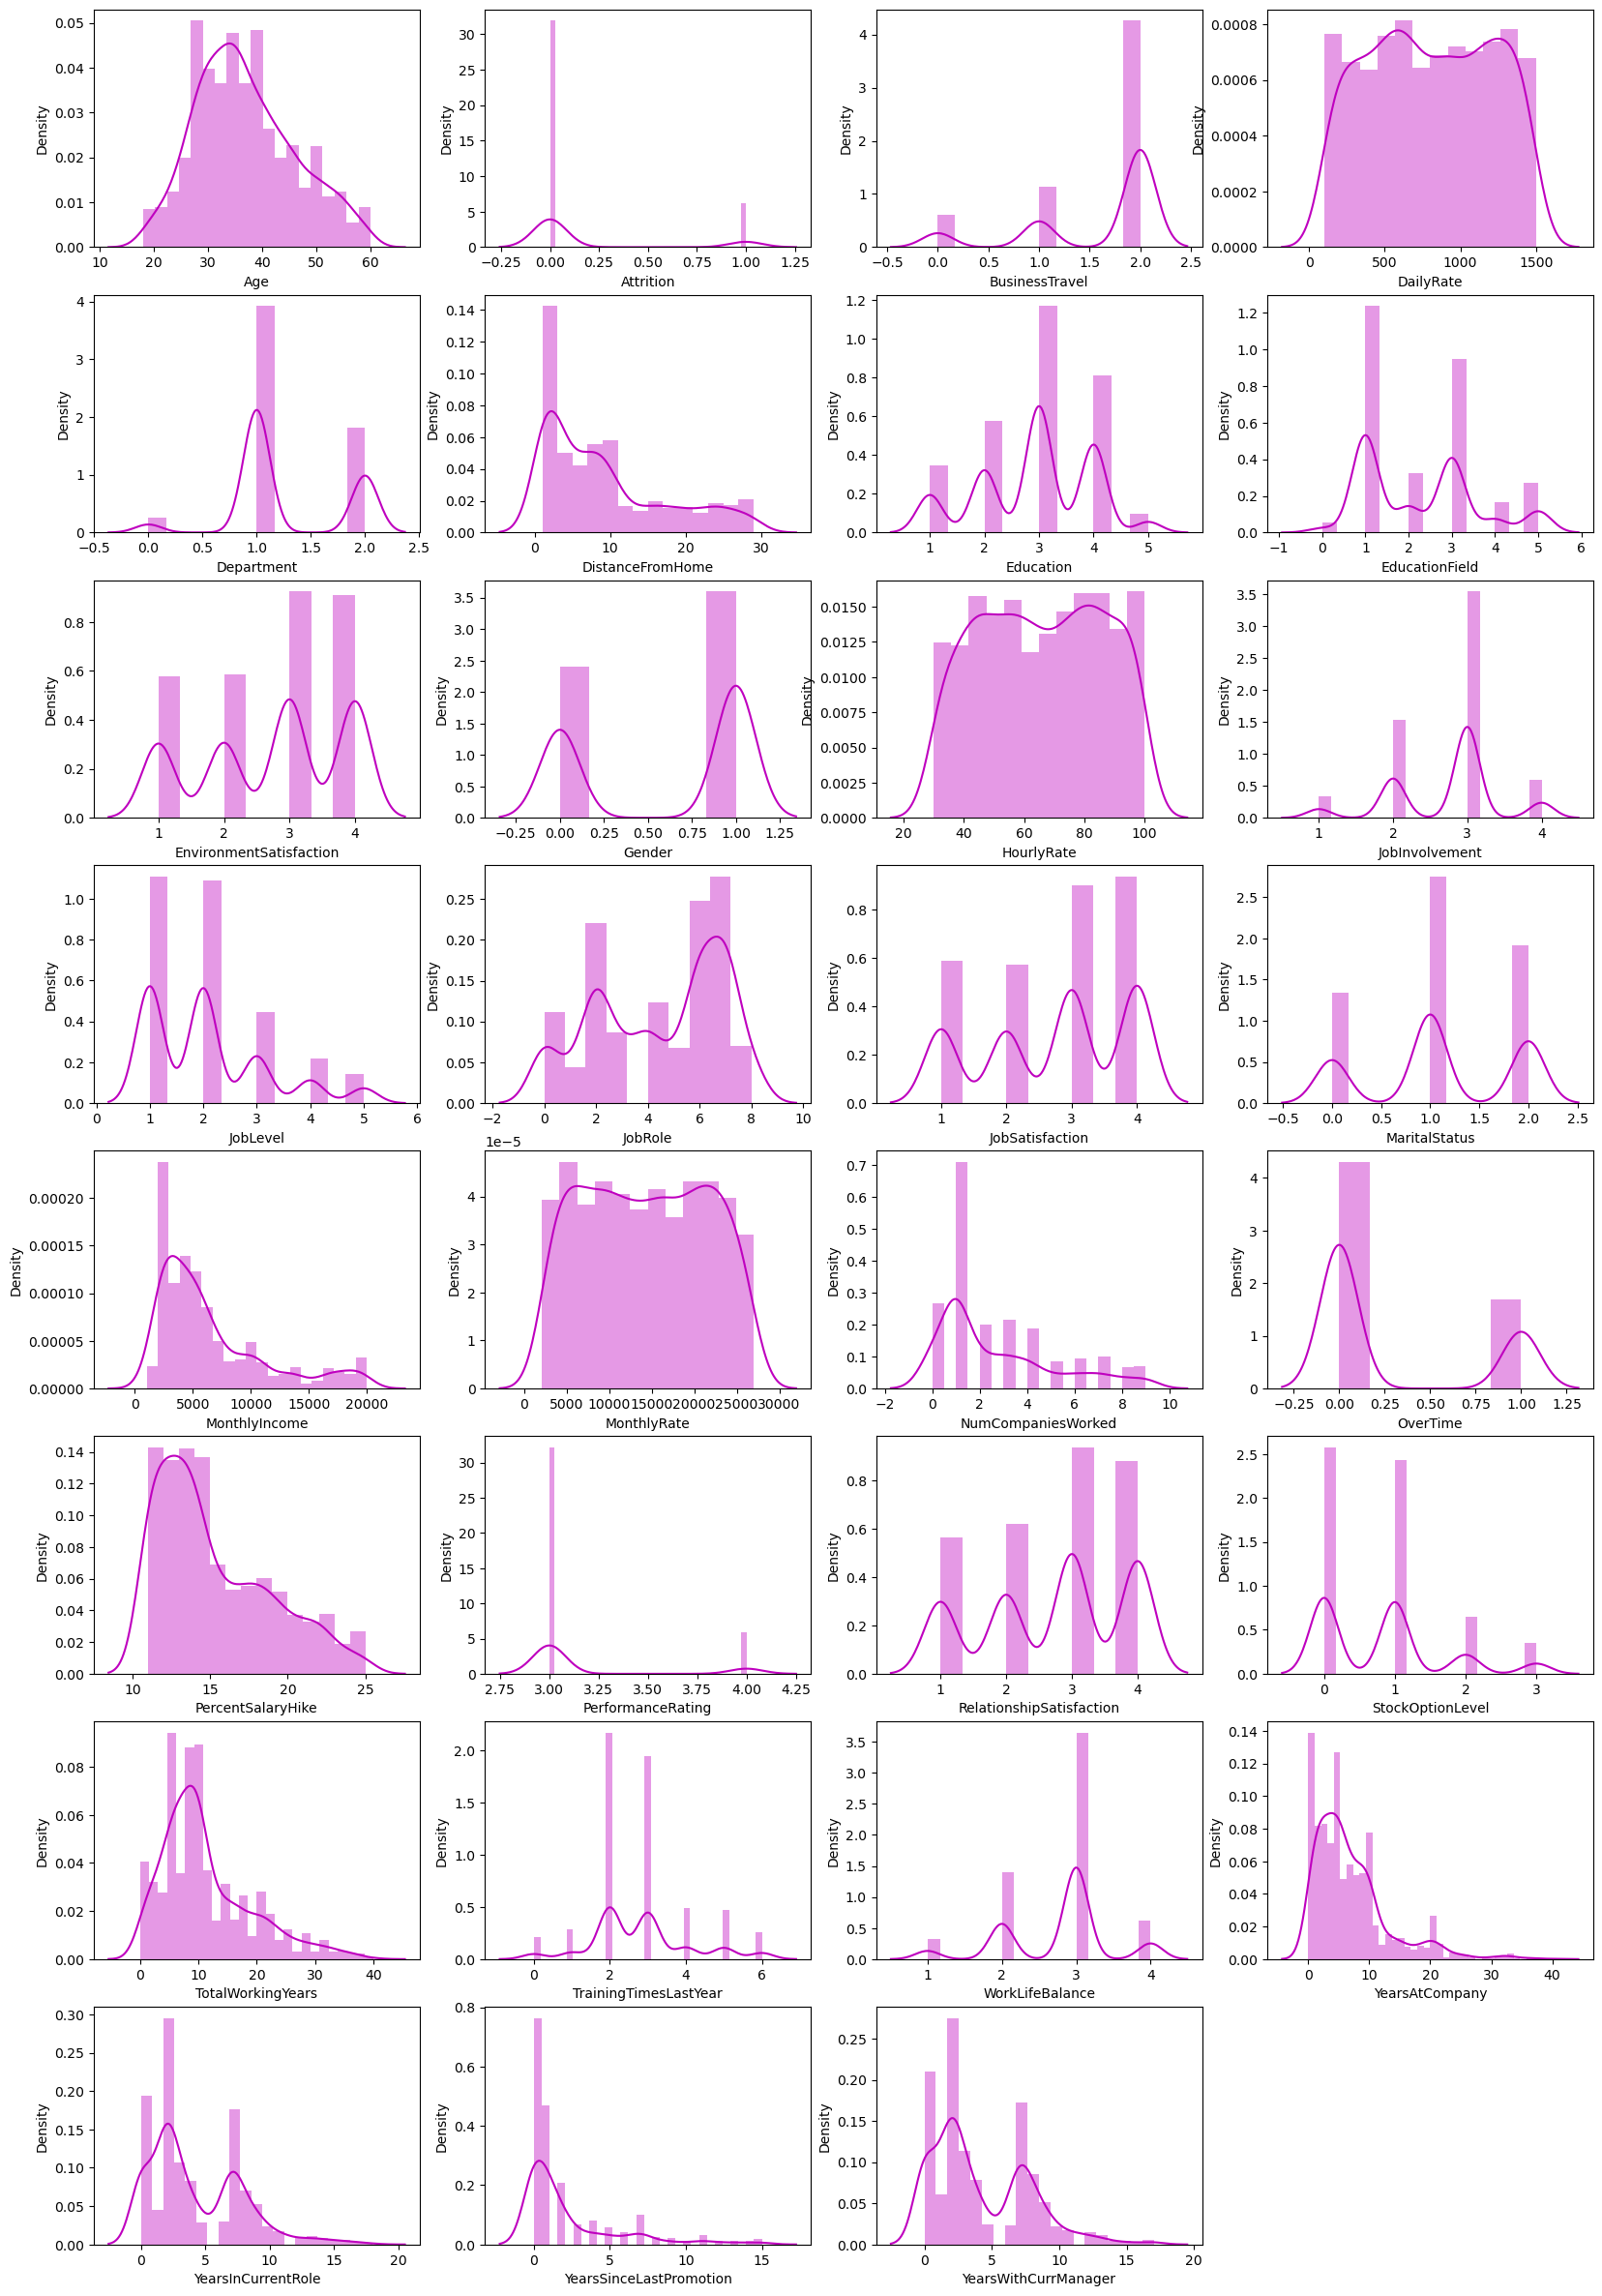

In [63]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(data[col], color="m")
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.show()

In [64]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [65]:
data['JobLevel']=np.sqrt(data['JobLevel'])
data['MonthlyIncome']=np.sqrt(data['MonthlyIncome'])
data['NumCompaniesWorked']=np.sqrt(data['NumCompaniesWorked'])
data['PerformanceRating']=np.sqrt(data['PerformanceRating'])
data['TotalWorkingYears']=np.sqrt(data['TotalWorkingYears'])
data['YearsAtCompany']=np.sqrt(data['YearsAtCompany'])
data['YearsSinceLastPromotion']=np.sqrt(data['YearsSinceLastPromotion'])

remove the skewness using np.sqrt

In [66]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.593923
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

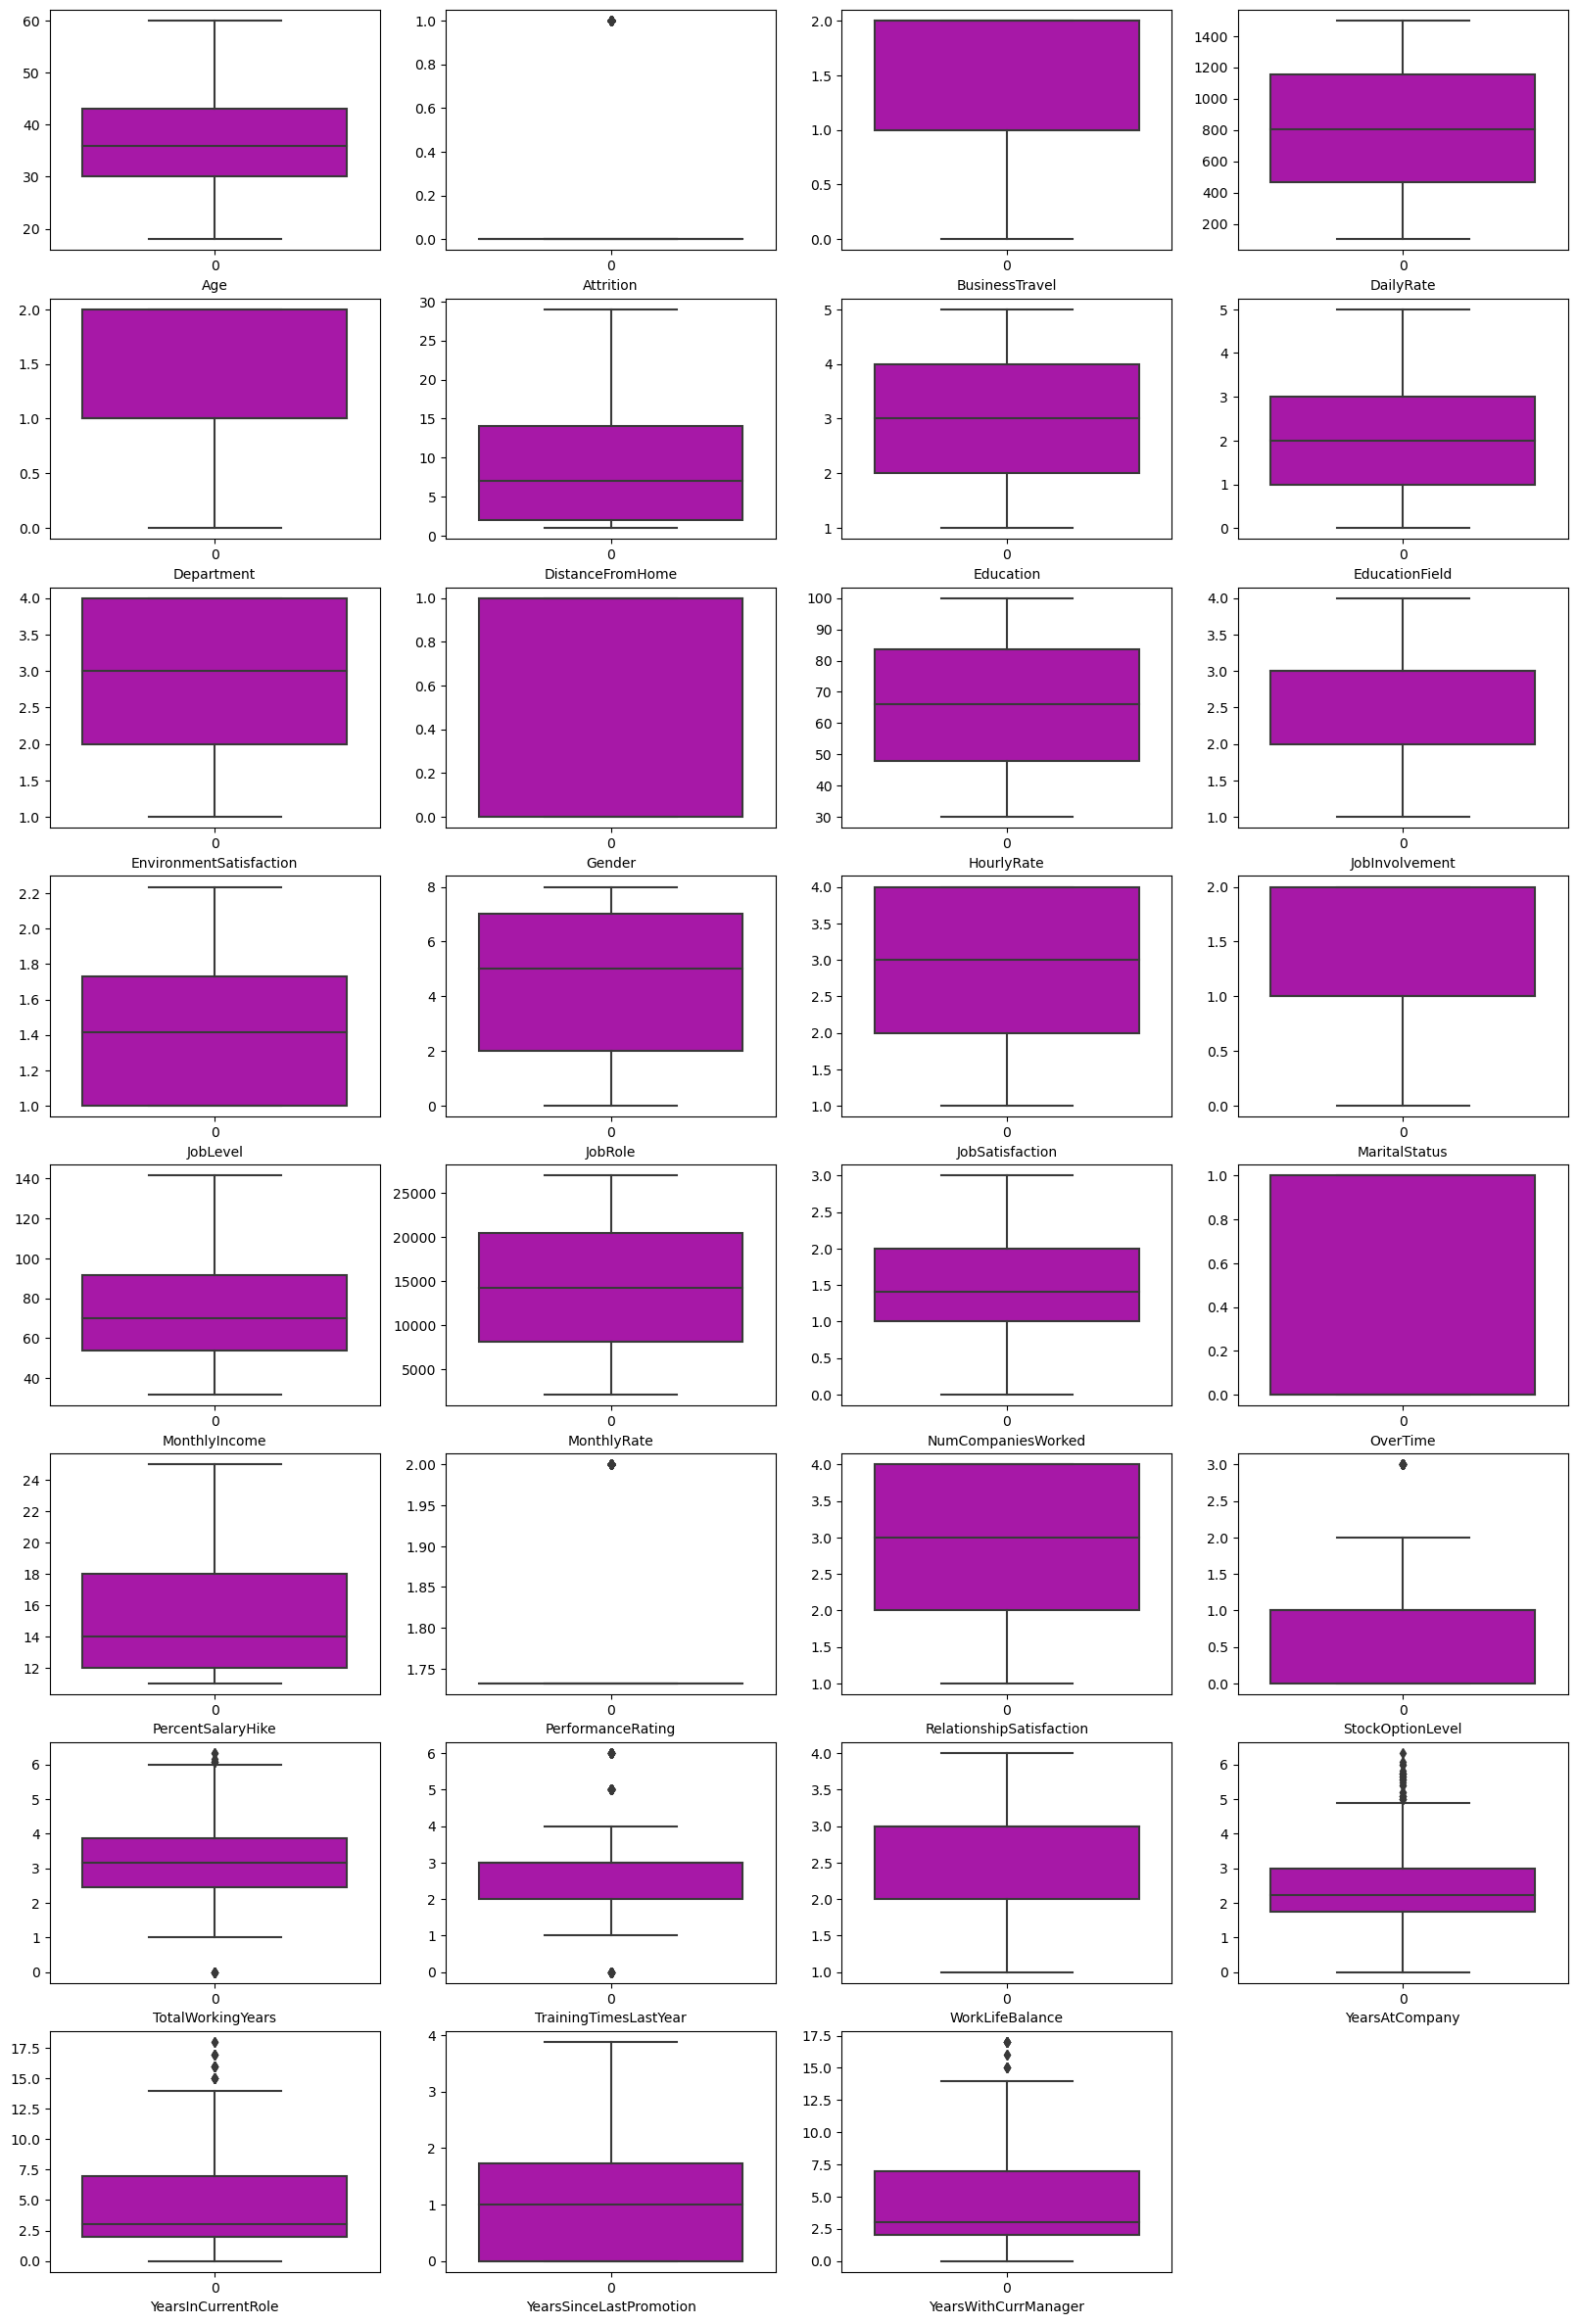

In [67]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for col in data:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(data[col], color="m")
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.show()

now it looks better now

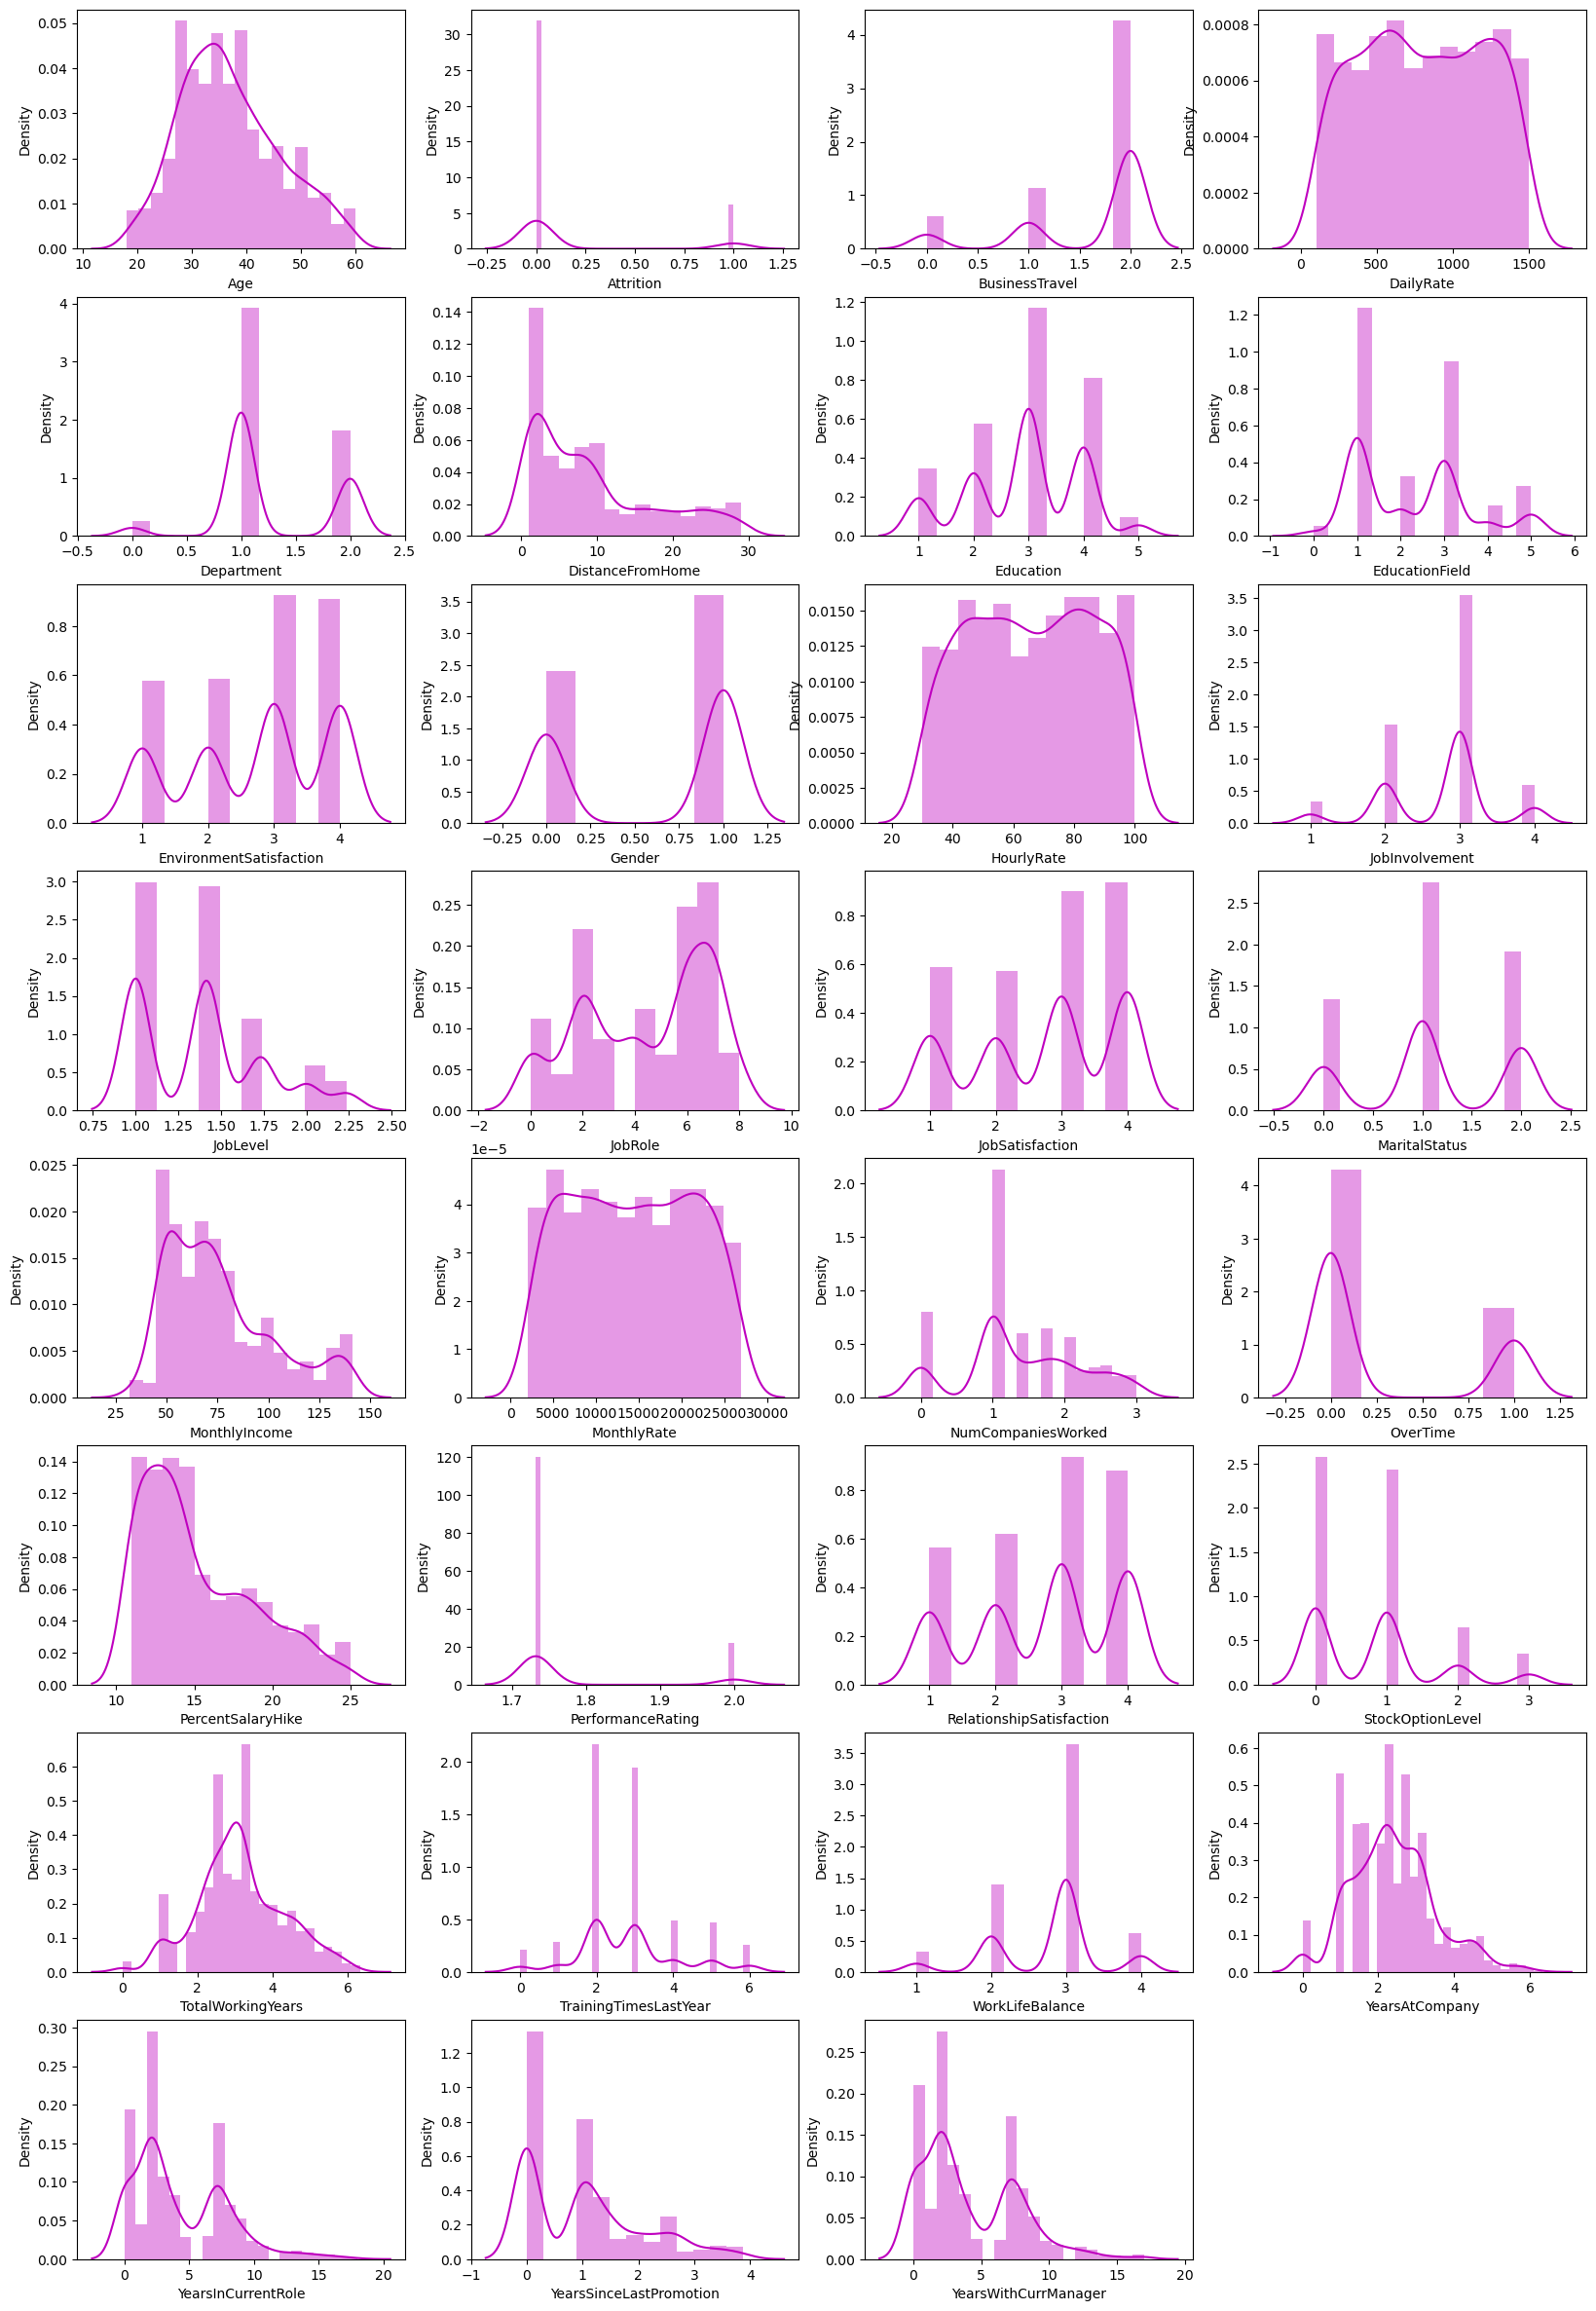

In [68]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(data[col], color="m")
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.show()

In [69]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [70]:
X = data.drop("Attrition",axis=1)
Y = data["Attrition"]

split the target and feature columns into two parts 

In [71]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,2,0.0,94,...,1.732051,1,0,2.828427,0,1,2.449490,4,0.000000,5
1,49,1.0,279,1.0,8,1,1.0,3,1.0,61,...,2.000000,4,1,3.162278,3,3,3.162278,7,1.000000,7
2,37,2.0,1373,1.0,2,2,4.0,4,1.0,92,...,1.732051,2,0,2.645751,3,3,0.000000,0,0.000000,0
3,33,1.0,1392,1.0,3,4,1.0,4,0.0,56,...,1.732051,3,0,2.828427,3,3,2.828427,7,1.732051,0
4,27,2.0,591,1.0,2,1,3.0,1,1.0,40,...,1.732051,4,1,2.449490,3,3,1.414214,2,1.414214,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,3,1.0,41,...,1.732051,3,1,4.123106,3,3,2.236068,2,0.000000,3
1466,39,2.0,613,1.0,6,1,3.0,4,1.0,42,...,1.732051,1,1,3.000000,5,3,2.645751,7,1.000000,7
1467,27,2.0,155,1.0,4,3,1.0,2,1.0,87,...,2.000000,2,1,2.449490,0,3,2.449490,2,0.000000,3
1468,49,1.0,1023,2.0,2,3,3.0,4,1.0,63,...,1.732051,4,0,4.123106,3,2,3.000000,6,0.000000,8


In [72]:
Y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.278944,-2.171982,-2.493820,0.040574,-0.063296,-0.989370,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,0.008926,0.155707,0.338096,0.684253,0.764998,-0.038311,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.436461,0.155707,0.338096,-2.171423,-1.167687,-0.989370,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.278944,0.155707,0.338096,0.382771,0.764998,0.657912,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.605693,0.155707,0.338096,-0.894326,-0.615492,0.355631,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.254625,0.816497,-1.224807,...,-0.426230,0.266233,0.241988,0.837424,0.155707,0.338096,-0.152155,-0.615492,-0.989370,-0.314873
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,1.169781,0.816497,-1.175601,...,-0.426230,-1.584178,0.241988,-0.131001,1.707500,0.338096,0.217807,0.764998,-0.038311,0.806541
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,-0.660531,0.816497,1.038693,...,2.346151,-0.658973,0.241988,-0.605693,-2.171982,0.338096,0.040574,-0.615492,-0.989370,-0.314873
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,1.169781,0.816497,-0.142264,...,-0.426230,1.191438,-0.932014,0.837424,0.155707,-1.077862,0.537709,0.488900,-0.989370,1.086895


Feature scaling using StandardScaler

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF values,Features
0,2.072116,Age
1,1.018360,BusinessTravel
2,1.023347,DailyRate
3,1.961139,Department
4,1.015723,DistanceFromHome
5,1.064213,Education
6,1.017213,EducationField
7,1.020107,EnvironmentSatisfaction
8,1.019879,Gender
9,1.021994,HourlyRate


here check the variance inflation factor (VIF) and one column is highly correleted with the other columns 

In [77]:
X.drop("JobLevel", axis=1, inplace=True)

drop the column who has highly co related with other columns

In [78]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF values,Features
0,2.071308,Age
1,1.015434,BusinessTravel
2,1.022713,DailyRate
3,1.881496,Department
4,1.012332,DistanceFromHome
5,1.064174,Education
6,1.016246,EducationField
7,1.018593,EnvironmentSatisfaction
8,1.019496,Gender
9,1.019580,HourlyRate


now it looks perfect

In [79]:
Y.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

here data is inbalance 

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
SM = SMOTE()
X1, Y1= SM.fit_resample(X,Y)

use SMOTE to balance the data

In [82]:
Y.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

In [83]:
Y1.value_counts()

1.0    1233
0.0    1233
Name: Attrition, dtype: int64

Finding the best random state 

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [85]:
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = .30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is ", maxAccu, "at random_state", maxRS)

Best Accuracy is  0.8979591836734694 at random_state 26


Best Accuracy is 0.8979591836734694 at random_state 26 using RandomForestClassifier

creating train and test split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .30, random_state = maxRS)

# Classification model

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# LogisticRegression

In [88]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8866213151927438
[[370  11]
 [ 39  21]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       381
         1.0       0.66      0.35      0.46        60

    accuracy                           0.89       441
   macro avg       0.78      0.66      0.70       441
weighted avg       0.87      0.89      0.87       441



The accurracy for this model is 88 % score using LogisticRegression

# RandomForestClassifier

In [89]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9002267573696145
[[379   2]
 [ 42  18]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       381
         1.0       0.90      0.30      0.45        60

    accuracy                           0.90       441
   macro avg       0.90      0.65      0.70       441
weighted avg       0.90      0.90      0.88       441



The accurracy for this model is 90 % score using RandomForestClassifier

# SVC

In [90]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8956916099773242
[[377   4]
 [ 42  18]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       381
         1.0       0.82      0.30      0.44        60

    accuracy                           0.90       441
   macro avg       0.86      0.64      0.69       441
weighted avg       0.89      0.90      0.87       441



The accurracy for this model is 89 % score using SVC

# GradientBoostingClassifier

In [91]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
pred = GBC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9024943310657596
[[373   8]
 [ 35  25]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       381
         1.0       0.76      0.42      0.54        60

    accuracy                           0.90       441
   macro avg       0.84      0.70      0.74       441
weighted avg       0.89      0.90      0.89       441



The accurracy for this model is 90 % score using  GradientBoostingClassifier

# AdaBoostClassifier

In [92]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
pred = ada.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8934240362811792
[[366  15]
 [ 32  28]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       381
         1.0       0.65      0.47      0.54        60

    accuracy                           0.89       441
   macro avg       0.79      0.71      0.74       441
weighted avg       0.88      0.89      0.89       441



The accurracy for this model is 89 % score using AdaBoostClassifier

# BaggingClassifier

In [93]:
Bagg = BaggingClassifier()
Bagg.fit(x_train, y_train)
pred = Bagg.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8820861678004536
[[373   8]
 [ 44  16]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       381
         1.0       0.67      0.27      0.38        60

    accuracy                           0.88       441
   macro avg       0.78      0.62      0.66       441
weighted avg       0.86      0.88      0.86       441



The accurracy for this model is 88 % score using BaggingClassifier

# DecisionTreeClassifier

In [94]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
pred = DT.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8072562358276644
[[328  53]
 [ 32  28]]
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89       381
         1.0       0.35      0.47      0.40        60

    accuracy                           0.81       441
   macro avg       0.63      0.66      0.64       441
weighted avg       0.83      0.81      0.82       441



The accurracy for this model is 80 % score using DecisionTreeClassifier

# ExtraTreesClassifier

In [95]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
pred = ETC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8843537414965986
[[378   3]
 [ 48  12]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       381
         1.0       0.80      0.20      0.32        60

    accuracy                           0.88       441
   macro avg       0.84      0.60      0.63       441
weighted avg       0.88      0.88      0.85       441



The accurracy for this model is 88 % score using ExtraTreesClassifier

# KNN

In [96]:
knn = KNN()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.891156462585034
[[381   0]
 [ 48  12]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       381
         1.0       1.00      0.20      0.33        60

    accuracy                           0.89       441
   macro avg       0.94      0.60      0.64       441
weighted avg       0.90      0.89      0.86       441



The accurracy for this model is 89 % score using KNN

In [98]:
score = cross_val_score(LR, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.79149798 0.80324544 0.77890467 0.77079108 0.78093306]
0.785074443011883
Difference between accuracy score and cross validation score is - 0.106082019573151


In [99]:
score = cross_val_score(RFC, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.75303644 0.97971602 0.96348884 0.96348884 0.98377282]
0.9287005937374252
Difference between accuracy score and cross validation score is - -0.03754413115239119


In [100]:
score = cross_val_score(svc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.89473684 0.92697769 0.91075051 0.92494929 0.9188641 ]
0.9152556848510729
Difference between accuracy score and cross validation score is - -0.02409922226603889


In [101]:
score = cross_val_score(GBC, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.56680162 0.97363083 0.95943205 0.95537525 0.97363083]
0.885774116990088
Difference between accuracy score and cross validation score is - 0.005382345594945992


In [102]:
score = cross_val_score(ada, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.61740891 0.94117647 0.92697769 0.9168357  0.93306288]
0.867092329043861
Difference between accuracy score and cross validation score is - 0.024064133541172983


In [103]:
score = cross_val_score(Bagg, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.74696356 0.95131846 0.93306288 0.93509128 0.96348884]
0.9059850046398568
Difference between accuracy score and cross validation score is - -0.014828542054822758


In [104]:
score = cross_val_score(DT, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.74898785 0.89249493 0.88843813 0.86409736 0.86409736]
0.8516231286595332
Difference between accuracy score and cross validation score is - 0.039533333925500846


In [105]:
score = cross_val_score(ETC, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.95951417 0.97363083 0.97363083 0.98782961 0.98985801]
0.9768926920202675
Difference between accuracy score and cross validation score is - -0.08573622943523351


In [106]:
score = cross_val_score(knn, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.80161943 0.83975659 0.82758621 0.79107505 0.81135903]
0.8142792618932259
Difference between accuracy score and cross validation score is - 0.07687720069180815


From the difference of both R2 score and cross validation score computed on R2 score we can conclude that ExtraTreesClassifier  as our best finding and best performing model.

# Hyper parameter tuning

In [107]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
             'random_state':[10,50,300,800,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,150,200]}

In [108]:
GSCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [109]:
GSCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 150, 200],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 300, 800, 1000]})

In [110]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [119]:
Best_model = ExtraTreesClassifier(criterion= 'gini', max_depth= 10, n_estimators= 200, n_jobs= -2, random_state= 1000)

In [120]:
Best_model.fit(x_train, y_train)
pred = Best_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

89.34240362811792


# Save the model

In [121]:
import joblib
joblib.dump(Best_model,"HR_analytics_evalution.pkl")

['HR_analytics_evalution.pkl']

# Predicting the saved model

In [122]:
Best_model = joblib.load("HR_analytics_evalution.pkl")

In [123]:
prediction = Best_model.predict(x_test)
prediction

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [124]:
model = np.array(y_test)
data = pd.DataFrame()
data["predicted"] = prediction
data["original"] = model
data

,predicted,original
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
436,0.0,1.0
437,0.0,0.0
438,0.0,1.0
439,1.0,1.0


steps:- first import the necessary libraries
Then read the data , Then perform the EDA preprocessing, feature engineering , then split the data into two parts first is target and one is features variables, then train and test the data using train test split, then build the different different models , and then check the performance of different different model, then check the cross validation score of different different model then find the best models in all the models then do hyperparameter tuning for choosing the best then save the model 